In [2]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Library untuk Preprocessing
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Library untuk Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Library untuk Evaluasi
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
# Memuat Dataset
TRAINING_DATA = [
    # Politik
    {
        "judul" : "Prabowo Minta Tak Politisasi Whoosh: Jangan Menari di Gendang Orang",
        "isi" : '''
        Presiden RI Prabowo Subianto meminta polemik utang proyek Kereta Cepat Jakarta Bandung alias Whoosh tidak dipolitisasi.
        Ia meminta seluruh pihak untuk tak khawatir dan menjadikan isu itu menjadi momentum menyudutkan pihak tertentu.

        "Jangan dipolitisasi, jangan kita menari di gendangnya orang," kata Prabowo di Stasiun Tanah Abang Baru, Jakarta, Selasa (4/11).
        
        Prabowo pun menduga mungkin ada pihak-pihak tak dikenal yang enggan melihat Indonesia bersatu. Ia meminta seluruh pihak untuk tetap tenang. Prabowo menegaskan, selaku Presiden RI ia bertanggung jawab atas isu tersebut.

        Prabowo mengaku telah mempelajari persoalan yang tengah jadi sorotan publik belakangan. Ia pun optimistis Indonesia dapat mengatasi persoalan tersebut.

        "Tidak usah khawatir, apa itu ribut-ribut Whoosh, saya sudah pelajari masalahnya. Tidak ada masalah, saya tanggung jawab nanti Whoosh itu semuanya. Indonesia bukan negara sembarangan. Kita hitung, tidak ada masalah itu," ujarnya.
        ''',
        "kategori" : "Politik"
    },
    {
        "judul" : "Di Sidang MKD, Kriminolog Ungkap Pemicu Massa Jarah Rumah Sahroni Dkk",
        "isi" : '''
        Kriminolog dari Universitas Indonesia (UI) Adrianus Meliala menyebut bahwa insiden penjarahan di sejumlah rumah anggota dewan dan menteri pada gelombang demo 25-31 Agustus sebagai akumulasi dari rasa kekecewaan masyarakat.
        Adrianus hadir sebagai saksi ahli dalam sidang pendahuluan kasus dugaan pelanggaran etik lima anggota DPR nonaktif di Mahkamah Kehormatan Dewan (MKD), Senin (3/11).

        Dia memahami ada banyak variabel yang memicu aksi tersebut. Namun, kata dia, satu hal yang patut diduga kuat menjadi pemicu adalah perasaan kolektif masyarakat atas rasa ketidakadilan (sense of injustice).
        "Ada satu hal yang saya duga kuat menjadi pemicu yaitu adanya collective feeling atau perasaan bersama berupa sense of injustice di tengah masyarakat," kata Adrianus.

        Dalam khazanah kepustakaan, kata dia, insiden penjarahan saat demo akhir Agustus sebagai limited looting atau penjarahan terbatas. Fenomenanya kemudian menjadi targeted looting atau penjarahan yang sudah ditargetkan atau direncanakan.

        Oleh karena itu, Adrianus meyakini aksi penjarahan di empat rumah anggota DPR dan satu menteri itu memang bukan spontan.

        "Penjarahan ini direncanakan, atau dalam istilah lain disebut predestined," katanya.

        Menurut Adrianus, rasa ketidakadilan kolektif itu kemudian dikuatkan lewat narasi-narasi yang berkembang di media sosial. Tak berhenti di situ, aksi kemudian dipicu ajakan turun ke jalan.

        "Namun, kondisi ini membutuhkan pemicu atau triggering. Ajakan-ajakan seperti 'kumpul di sini', 'bakar Monas', atau 'serang Mabes Polri' itulah yang saya sebut sebagai trigger atau faktor pencetus," katanya.
        Puncaknya, lanjut Adrianus, perasaan kolektif atas ketidakadilan berubah menjadi kemarahan setelah timbul korban oleh tindakan kepolisian. Dia menyebut, tanpa ada perasaan kolektif, kerusuhan tak bisa pecah.

        "Apa yang dilakukan oleh beberapa kalangan tersebut adalah bagian dari triggering yang kemudian ditindaklanjuti oleh kepolisian karena memenuhi unsur perencanaan dan menimbulkan korban," katanya.

        Dalam insiden itu setidaknya empat kediaman anggota DPR menjadi target yakni rumah Ahmad Sahroni dan Nafa Urbach dari NasDem, Eko Patrio dan Uya Kuya dari PAN, lalu satu rumah Sri Mulyani yang kala itu masih menjabat sebagai Menteri Keuangan.

        Empat anggota DPR itu plus satu nama lain, Adies Kadir saat ini telah dinonaktifkan dan kasusnya dalam proses persidangan di MKD.
        ''',
        "kategori": "Politik"
    },
       {
        "judul" : "Relawan Prabowo: Jangan Adu Domba Projo dengan Jokowi",
        "isi" : '''
        Ketua Umum Relawan Pasukan Bawah Tanah (Pasbata) Prabowo, David Febrian Sandi, mengingatkan semua pihak agar tak mengadu domba Presiden ke-7 RI Joko Widodo (Jokowi) dengan relawan pendukungnya, Projo.
        David menilai dukungan Projo terhadap pemerintahan Prabowo Subianto-Gibran Rakabuming Raka merupakan langkah yang sah dan terhormat.

        "Jangan ada yang mencoba mengadu domba kami. Kami lahir dari Bapak Jokowi, dan hari ini kami berjuang bersama Bapak Prabowo untuk melanjutkan cita-cita besar beliau demi rakyat dan negara," kata David dalam keterangannya, Senin (3/11).

        David membantah rencana perubahan logo Projo sebagai tanda lupa diri. Menurut dia, hal itu wujud kedewasaan dan kematangan organisasi. David bilang Projo akan tetap membawa nilai-nilai Jokowi dalam melanjutkan kerja organisasi.

        "Perubahan simbol tidak menghapus sejarah. Dengan nama Projo saja, semua orang tahu asal-usul dan semangat kami," katanya.

        David meminta agar isu yang mengadu domba Projo dengan Jokowi maupun Prabowo dihentikan. Dia mengingatkan bahwa Pilpres sudah usai, dan mestinya tak ada lagi energi yang dihabiskan untuk hal tak berguna.

        "Sudahlah, kita sudahi semua ini. Pilpres sudah lewat. Mari kita ajari rakyat kita untuk pintar, bukan disuguhi pembodohan lewat isu-isu tak bermutu seperti ijazah dan lain-lain," katanya.
        Ketua Umum relawan Projo Budi Arie Setiadi yang kembali terpilih untuk periode 2025-2030 membantah isu hubungannya dengan Presiden ke-7 RI Joko Widodo telah terputus. Dia juga meminta kepada awak media untuk tidak 'mengadu domba' antara Projo dengan Jokowi.

        "Saya ingin menjelaskan kepada teman-teman media sekalian karena dari perkembangan berita ini seolah-olah disampaikan terkesan Projo putus hubungan dengan Pak Jokowi, jangan di-framing," kata Budi Arie di Kongres ke-3 Projo, Jakarta, Minggu (2/11).

        Budi Arie mengaku masih menjalin hubungan dengan Jokowi. Dia bahkan berkomunikasi dengan Jokowi soal wacana perubahan lambang Projo.

        "Tadi pagi saya masih komunikasi dengan Bapak Jokowi. Bahwa perubahan logo adalah bagian dari transformasi organisasi Projo untuk menjawab tantangan dan perkembangan zaman," ucapnya.
        ''',
        "kategori": "Politik"
    },
       {
        "judul" : "Alasan Megawati Tak Mau Punya HP: Saya Orang yang Dicari",
        "isi" : '''
        Ketua Umum PDIP Megawati Soekarnoputri mengatakan dirinya adalah sosok yang ingin diketahui dan sering dicari oleh banyak orang. Hal itu yang membuat dirinya tidak mau memiliki ponsel hingga saat ini.
        Hal ini disampaikan Megawati saat menjadi pembicara kunci (keynote speaker) dalam seminar internasional peringatan ke-70 tahun Konferensi Asia Afrika (KAA) di Perpustakaan Bung Karno, Blitar, Jawa Timur, Sabtu (31/10).
        Dalam pidato, Presiden RI ke-5 ini awalnya menyinggung kebiasaan banyak orang yang lebih fokus pada ponsel mereka, bahkan di momen-momen penting.

        "Untuk apa kalian datang, hah? Kalau ininya enggak dipakai untuk mendengarkan sesuatu yang menurut saya sangat berarti. Hanya nampang? Sorry for my friend, this is not for you, this is for my people. Juga kalian boleh ngomong, sekarang juga di luar negeri banyak yang begitu. Orang serius tidak banyak lagi," ujar Megawati.

        Megawati lantas mengaku sempat berpikir perlunya ada aturan mengenai penggunaan HP. Ia juga mengatakan alasannya tidak memiliki HP karena ada banyak orang ingin mengetahui tentang dirinya, sementara tidak semuanya memiliki niat baik.
        "I don't have HP because, do you know why? Karena saya orang yang dicari. Do you understand what I mean? Everybody wants to know me, but not everybody is a good person. Do you understand? Jadi saya enggak punya HP. Enggak. Kalau orang bilang, (ada yang) ngintel, intel, or spying," katanya.

        Lebih lanjut, seminar internasional dalam rangka peringatan ke-70 tahun KAA ini mengusung tema 'Bung Karno in a Global History: Commemorative Seminar of the 70th Anniversary of the 1955 Bandung Asian-African Conference'.

        Dalam pidato tersebut, Megawati juga menyerukan kepada masyarakat dunia untuk membangun tatanan global baru yang berpijak pada nilai kemanusiaan, keadilan, dan kesetaraan dengan Pancasila.

        "Dunia lama yang dibangun di atas kolonialisme dan imperialisme harus digantikan oleh dunia baru yang berkeadilan," tutur Megawati.

        Menurutnya, di tengah krisis moral global, ketimpangan digital, dan konflik geopolitik yang berlarut, dunia membutuhkan nilai universal baru yang tidak berakar pada kekuasaan, tetapi pada kemanusiaan.

        "Tanpa dasar moral yang kuat, dunia akan terus diwarnai pertarungan hegemoni sebagaimana perang Rusia-Ukraina dan krisis di Timur Tengah," kata Megawati.

        Megawati sendiri sudah tiba di Kota Blitar sejak Jumat (30/10). Para delegasi dari berbagai negara di Asia dan Afrika yang menjadi peserta seminar lebih dulu berziarah ke makam Presiden pertama RI, Soekarno. Mereka berdoa dan menabur bunga di makam Bung Karno.
        ''',
        "kategori": "Politik"
    },
       {
        "judul" : "Bobby Bela Guru di Deliserdang yang Dilaporkan Orang Tua Siswa",
        "isi" : '''
        Gubernur Sumatera Utara (Sumut) Bobby Nasution menemui Sopian Daulai Nadeak, guru SMK Negeri 1 Kutalimbaru, Kabupaten Deliserdang, yang dilaporkan orang tua siswa ke polisi.
        Pertemuan berlangsung di rumah Sopian, di Binjai, Jumat (31/10). Dalam kesempatan itu, Bobby menyampaikan harapannya agar kedua pihak bisa berdamai.

        Sopian dilaporkan setelah berupaya melerai perkelahian antar-siswa di sekolah. Ia mengaku justru menjadi korban penganiayaan dan telah membuat laporan balik ke pihak kepolisian, baru-baru ini.

        "Kalau dari kita, pasti ingin damai, dua-duanya. Harapan kita tentu dari pihak sekolah, murid, dan orang tua murid, ini sama-sama tugas kita mendidik anak. Jadi kita inginnya damai," ujar Bobby.
        Bobby mengharapkan keduanya bisa mencabut laporan yang telah disampaikan ke polisi. Namun jika orang tua siswa tak mau damai, ia memastikan Pemprov Sumut akan mendampingi guru tersebut.

        Ia memastikan akan memberikan dukungan penuh kepada guru yang bertindak benar dalam melaksanakan tugasnya.

        "Kalau memang dari orang tua murid berkeras tidak mau damai, ya pemerintah provinsi akan mem-backup penuh guru kita yang dalam hal ini melerai perkelahian, tapi malah dilaporkan ke polisi. Kita akan backup penuh," tegasnya.

        Bobby juga meminta agar Sopian tidak mengundurkan diri sebagai guru. Pihak sekolah memberi kesempatan kepada Sopian untuk beristirahat sementara guna menenangkan diri.

        "Jangan mundur, nggak boleh, tadi saya sampaikan nggak boleh, nggak apa apa dikasih waktu cuti, menenangkan pikiran dan keadaan, karena ada kejadian ini," ujar Bobby.

        Pada kesempatan tersebut, Bobby juga memberi pesan pada seluruh guru di Sumut. Ia mempercayai penuh semua tindakan yang dilakukan guru di sekolah. Ia mempersilakan guru untuk memberikan teguran pada anak-anak apabila bersalah.

        "Jangan takut intervensi dari manapun, ya tapi juga jangan terlalu keras, jangan terlalu keterlaluan sampai sampai ada luka fisik ataupun trauma kepada anaknya, hukuman itu untuk membuat jera bukan untuk membuat trauma," kata Bobby.
        ''',
        "kategori": "Politik"
    },
       {
        "judul" : "KPK Tetapkan Eks Sekjen Kemnaker Tersangka Dugaan Pemerasan TKA",
        "isi" : '''
        Komisi Pemberantasan Korupsi (KPK) menetapkan mantan Sekretaris Jenderal Kementerian Ketenagakerjaan (Kemnaker) RI Heri Sudarmanto sebagai tersangka kasus dugaan pemerasan dan penerimaan gratifikasi terkait pengurusan Rencana Penggunaan Tenaga Kerja Asing (RPTKA).
        "Benar, dalam pengembangan penyidikan perkara ini, KPK menetapkan satu orang tersangka baru, Sdr. HS. Mantan Sekjen Kemnaker," ujar Juru Bicara KPK Budi Prasetyo saat dikonfirmasi melalui pesan tertulis, Rabu (29/10).

        Penetapan tersangka tersebut berdasarkan Surat Perintah Penyidikan (Sprindik) bulan ini.

        KPK sebelumnya sudah lebih dulu memproses hukum 8 orang tersangka dalam kasus dugaan pemerasan dan penerimaan gratifikasi terkait pengurusan RPTKA di Kementerian Ketenagakerjaan. Mereka sudah dilakukan penahanan.

        Para tersangka dimaksud ialah Gatot Widiartono selaku Kepala Subdirektorat Maritim dan Pertanian Direktorat Jenderal Pembinaan Penempatan Tenaga Kerja dan Perluasan Kesempatan Kerja (Dirjen Binapenta & PKK) tahun 2019-2021 sekaligus PPK PPTKA tahun 2019-2024 serta Koordinator Bidang Analisis dan Pengendalian TKA Direktorat PPTKA Kementerian Ketenagakerjaan tahun 2021-2025.

        Kemudian Putri Citra Wahyoe, Jamal Shodiqin dan Alfa Eshad yang merupakan Staf pada Direktorat PPTKA pada Ditjen Binapenta & PKK Kementerian Ketenagakerjaan tahun 2019-2024.

        Lalu Dirjen Binapenta & PPK Kementerian Ketenagakerjaan tahun 2020-2023 Suhartono dan Direktur PPTKA 2019-2024 yang diangkat sebagai Dirjen Binapenta 2024-2025 Haryanto.

        Selanjutnya Direktur PPTKA 2017-2019 Wisnu Pramono serta Koordinator Uji Kelayakan Pengesahan PPTKA tahun 2020-Juli 2024 yang diangkat menjadi Direktur PPTKA 2024-2025 Devi Angraeni.

        Selama periode tahun 2019-2024, jumlah uang yang diterima 8 orang tersangka dan pegawai pada Direktorat PPTKA sekurang-kurangnya adalah Rp53,7 miliar.

        Sampai saat ini, sejumlah pihak termasuk para tersangka telah mengembalikan uang ke negara melalui rekening penampungan KPK dengan total sebesar Rp8,61 miliar.

        Dalam proses berjalan, penyidik telah melakukan penggeledahan di beberapa tempat yakni di Jabodetabek dan Jawa Timur yang merupakan kantor Kementerian Ketenagakerjaan, rumah para tersangka, rumah pihak terkait, dan kantor para agen pengurusan TKA.

        KPK setidaknya telah melakukan penyitaan terhadap 14 unit kendaraan, terdiri atas 11 unit mobil dan tiga unit sepeda motor.

        Satu unit motor disita dari Risharyudi Triwibowo yang merupakan Staf Khusus mantan Menteri Ketenagakerjaan Ida Fauziah. Risharyudi saat ini menjabat sebagai Bupati Buol.

        Para tersangka disangkakan melanggar Pasal 12 huruf e atau Pasal 12 B juncto Pasal 18 Undang-undang Pemberantasan Tindak Pidana Korupsi juncto Pasal 55 ayat (1) ke-1 Kitab Undang-undang Hukum Pidana (KUHP) juncto Pasal 64 ayat (1) KUHP.
                ''',
        "kategori": "Politik"
    },
    {
        "judul" : "Menhut Mengaku Diutus Prabowo ke Brasil Bawa Pesan Penting soal Iklim",
        "isi" : '''
        Presiden Prabowo Subianto mengutus Menteri Kehutanan (Menhut) Raja Juli Antoni dan Utusan Khusus Presiden Hashim Djojohadikusumo menghadiri Konferensi Tingkat Tinggi Perubahan Iklim (COP30) di Belém, Brasil.
        Raja Juli mengatakan dalam forum itu Indonesia akan memaparkan komitmen terhadap aksi iklim, transisi energi serta target FOLU Net Sink 2030.

        "Indonesia akan membawa pesan penting di COP30 bahwa hutan tropis adalah aset global yang harus dikelola secara adil dan berkelanjutan," ujarnya di Kompleks Istana Kepresidenan, Kamis (23/10)

        Raja Juli mengatakan isu itu kemudian akan dilanjutkan dalam forum Business Roundtable yang diselenggarakan oleh International Emissions Trading Association (IETA) di Sao Paulo.

        Kemudian kata dia, akan dilakukan penandatanganan Nota Kesepahaman antara Kementerian Kehutanan dengan Integrity Council for the Voluntary Carbon Market terkait peningkatan transparansi dan kredibilitas mekanisme pasar karbon.

        Selain itu, Raja Juli menyebut Indonesia juga diundang oleh The Royal Foundation of The Prince and Princess of Wales untuk hadir dalam acara United for Wildlife Global Summit & High-Level Ministerial Roundtable di Rio de Janeiro, pada 4 November.

        Ia menjelaskan pertemuan ini akan membahas langkah bersama terkait penanganan kejahatan lingkungan serta peran masyarakat lokal terhadap aksi penebangan liar, penambangan liar dan perdagangan satwa liar.

        "Masyarakat lokal termasuk yang paling terdampak oleh kejahatan-kejahatan tersebut. Kehadiran kami di forum ini menjadi bentuk dukungan terhadap kolaborasi global yang berkeadilan untuk melindungi satwa dan ekosistemnya," pungkasnya.

        Sebelumnya Presiden Prabowo Subianto menyampaikan permintaan maaf secara langsung kepada Presiden Brasil Luiz Inácio Lula da Silva karena tidak bisa menghadiri COP 30 di Brasil. Meski begitu, ia memastikan Indonesia mendukung inisiatif dan kepemimpinan Brasil di COP 30.

        "Saya mendukung dalam kepemimpinan Brasil di COP 30. Saya tadi minta maaf mungkin saya sulit menghadiri COP 30 di Belém, Brasil. Tapi saya akan kirim delegasi yang kuat untuk hadir dengan keputusan kita untuk mendukung insiatif-inisiatif dari Brasil," ujarnya.
        ''',
        "kategori": "Politik"
    },
    {
        "judul" : "Kemendagri soal Pejabat Pakai Mobil Nasional: Kepala Daerah Siap-siap",
        "isi" : '''
        Kementerian Dalam Negeri (Kemendagri) menanggapi arahan Presiden Prabowo Subianto terkait penggunaan mobil Maung sebagai kendaraan dinas.
        Wakil Menteri Dalam Negeri Bima Arya menyatakan lembaganya siap mendukung rencana Presiden Prabowo tersebut.

        "Kami tentu sangat siap," kata Bima saat ditemui di Balai Kota Solo, Selasa (21/10).

        Ia mengatakan kebijakan penggunaan mobil nasional sebagai kendaraan dinas tidak hanya berlaku untuk pimpinan kementerian dan lembaga di tingkat pusat. Secara bertahap, pemerintah akan menerapkan kebijakan tersebut hingga tingkat daerah.

        "Nanti kita sampaikan kepala daerah juga siap-siap. Kita harus dukung program Presiden untuk menggunakan mobil nasional dimulai dari para pimpinan baik di pusat maupun daerah," kata dia.

        Sebelumnya, Presiden Prabowo Subianto yakin Indonesia akan memiliki mobil buatan lokal dalam tiga tahun mendatang.

        "Kita akan punya mobil buatan Indonesia dalam 3 tahun yang akan datang. Saya sudah alokasi dana, sudah kita siapkan lahan untuk pabrik-pabriknya. Sedang bekerja sekarang tim," ujar Prabowo di sidang kabinet di Istana Negara Jakarta, Senin (20/10).

        Dalam sidang tersebut, Prabowo juga membanggakan Maung sebagai jeep buatan Tanah Air. Ia mengatakan para pejabat di pemerintahannya tak lagi memakai jeep buatan negara lain.

        Prabowo bahkan mewajibkan semua yang hadir dalam sidang kabinet tersebut menggunakan mobil Maung di kemudian hari. Menurutnya, para pejabat bisa menggunakan mobil selain Maung di hari libur.

        "Saya enggak mau tahu. Yang mobil-mobil bagus dipakai kalau libur saja. Pada saat saya enggak panggil kau, bolehlah kau pakai mobil itu," ucapnya.
                ''',
        "kategori": "Politik"
    },
    {
        "judul" : "Prabowo Minta BGN Sediakan Sendok Cegah Keracunan MBG",
        "isi" : '''
        Presiden Prabowo Subianto meminta Badan Gizi Nasional (BGN) untuk menyediakan sendok agar dapat digunakan para siswa penerima program Makan Bergizi Gratis.
        Hal tersebut disampaikan Prabowo dalam Sidang Kabinet Paripurna, di Istana Negara, Jakarta, pada Senin (20/10) sore.

        Prabowo juga meminta agar BGN dapat membuat prosedur pelaksanaan MBG secara ketat dan menggunakan alat-alat terbaik. Menurutnya hal itu diperlukan agar tidak ada lagi kasus keracunan makanan yang dialami para siswa.

        "Saya tekankan Kepala BGN dan jajaran untuk menghasilkan suatu prosedur tetap yang ketat, menggunakan alat-alat terbaik, untuk kita jamin kekurangan atau penyimpangan tidak terjadi," ujarnya.

        Prabowo kemudian menyinggung kebiasaan makan anak-anak yang menggunakan tangan alias tanpa bantuan sendok. Ia lantas meminta guru dan orang tua untuk membiasakan anak-anak mencuci tangan dengan bersih menggunakan sabun.

        "Kita juga harus yakinkan para guru-guru yang semua terlibat untuk mendidik anak-anak kita kalau makan pakai tangan harus cuci tangan dengan sebaik-baiknya. Di setiap sekolah harus tersedia air yang bersih, juga dengan sabun," jelasnya.

        "Kita harus didik juga, yang namanya anak-anak sudah merasa dicuci tangannya. Kita sebagai guru dan orang tua tidak boleh malas untuk mengingatkan," lanjutnya.

        Di sisi lain, ia menilai saat ini BGN juga sudah harus bisa menyediakan sendok untuk MBG. Menurutnya BGN masih mampu untuk menganggarkan sendok sederhana di setiap kotak makan.

        "Mungkin kita harus sekarang, Kepala BGN, mungkin, sudahlah, dibagi aja sendok yang sederhana, tidak apa-apa. Saya kira sendok itu tidak terlalu mahal," jelasnya.

        Lebih lanjut, Prabowo menyebut sejak program MBG diluncurkan pada 6 Januari 2025, hingga saat ini sudah 36,7 juta orang menerima MBG.

        Ia tidak menampik apabila dalam pelaksanaannya memang masih terdapat kekurangan. Namun, ia menilai kekurangan seperti keracunan itu masih dalam batas wajar.

        "Kalau tidak salah, kekurangannya adalah katakanlah angka yang sakit itu adalah mungkin sekitar 0,0007 yang berarti 99,99 persen berhasil," ujarnya.

        "Dalam sepanjang usaha manusia hampir tidak ada usaha manusia yang dilaksanakan selama 1 tahun dengan volume yang demikian besar, yang zero error, zero deffect. Sangat sulit," imbuhnya.
                ''',
        "kategori": "Politik"
    },
    {
        "judul" : "Bahlil soal Prabowo Tegur Menteri Nakal: Saya Setiap Dipanggil Ditegur",
        "isi" : '''
        Menteri Energi dan Sumber Daya Mineral (ESDM) Bahlil Lahadalia buka suara soal isu yang menyebut ada sejumlah menteri yang ditegur oleh Presiden Prabowo Subianto.
        "Saya belum tahu itu, yang tahu itu hanya presiden, sesama bus kota jangan saling mendahului," kata Bahlil usai rapat di kediaman Prabowo di Kertanegara, Jakarta Selatan, Minggu (19/10).

        Namun, saat ditanya apakah dirinya pernah ditegur Prabowo, Bahlil tak menjawabnya secara gamblang.

        "Ditegur apa? Saya setiap dipanggil pasti ditegur, tegur sapa, ditegur sayang, ditegur perintah, kan tegur semuanya, kan bapak presiden orangnya sangat terbuka, pasti mungkin kamu juga kalau setiap hari ikut rapat, pasti ditegur," tutur dia.

        Sebelumnya, Prabowo memperingatkan para menteri untuk bekerja dengan benar dan tidak melakukan penyalahgunaan. Ia mewanti-wanti kepada menterinya, jika tiga kali diberi peringatan masih 'nakal', akan diganti.

        "Anak buah saya hebat-hebat ya. Kalau ada satu dua nakal, saya peringati ya kan?" kata Prabowo saat memberikan orasi ilmiah di sidang senat terbuka Universitas Kebangsaan Republik Indonesia (UKRI) di The Trans Luxury Hotel, Jawa Barat, mengutip detikcom, Sabtu (18/10).

        "Satu kali peringatan masih masih nakal, masih enggak mau dengar, dua kali peringatan, tiga kali, apa boleh buat reshuffle," lanjutnya.

        Dalam kesempatan itu, Prabowo tidak akan kasihan pada menterinya yang nakal. Ia akan bertindak tegas kepada para pembantunya.

        "Harus diganti karena, demi negara bangsa dan rakyat, tidak boleh ada rasa kasihan, yang kasihan rakyat Indonesia," ujarnya.
                ''',
        "kategori": "Politik"
    },

    # Olahraga
    {
        "judul" : "Huijsen Anggap Latihan di Anfield Tak Penting: Hanya Lapangan Biasa",
        "isi" : '''
        Bek Real Madrid Dean Huijsen menilai berlatih di Stadion Anfield sebelum Liverpool versus Real Madrid di Liga Champions Eropa, tak terlalu penting.
        Ini diungkapkan mantan pemain Bournemouth tersebut dalam sesi jumpa pers sebelum laga. Menurutnya, lapangan Stadion Anfield sama saja dengan lapangan lainnya.

        "Secara pribadi, saya sudah pernah bermain di sini [Anfield], tetapi sejujurnya, saya rasa itu tidak akan menjadi masalah bagi saya," kata Huijsen dilansir dari Liverpool Echo.

        Musim lalu, saat masih membela Bournemouth, Huijsen dua kali menghadapi Liverpool. Dalam laga tandang dan kandang tersebut Huijsen sama-sama mengoleksi kartu kuning.

        Kali ini, jika nantinya dipercaya Xabi Alonso sebagai pilihan utama, Huijsen ingin memberikan dampak positif pada tim. Ia ingin menang pertama kali di Anfield.

        Kondisi internal Madrid menjelang laga ini pun dianggap tanpa kendala. Persoalan Vinicius Jr dengan Alonso, disebutnya sudah selesai di ruang ganti dan tak perlu dibesar-besarkan.

        "Sejujurnya, banyak sekali yang ditulis di media tentang hal itu dan Anda membesar-besarkan sesuatu yang sebenarnya bukan hal besar," kata pemain 20 tahun ini.

        "Dia [Vinicius] meminta maaf. Saya rasa itu benar. Dia pria yang luar biasa dan rekan setim yang hebat. Hal-hal seperti ini memang biasa terjadi dalam sepak bola."
        ''',
        "kategori" : "Olahraga"
    },
    {
        "judul" : "Piala Dunia U-17: Portugal 'Si Raja Eropa' Tebar Ancaman",
        "isi" : '''
        Portugal berhasil meraih kemenangan besar lawan Kaledonia Baru di laga perdana Piala Dunia U-17 2025. Sebagai Raja Eropa, Portugal memberikan pengumuman penting bahwa mereka layak jadi favorit juara di turnamen ini.
        Portugal sempat dikejutkan oleh Kaledonia Baru lewat gol Ezekiel Wamowe di menit ke-11. Gol tersebut membuat Portugal tertinggal cepat di awal pertandingan.

        Namun setelah itu, Portugal bisa menyamakan skor jadi 1-1 lewat gol Anisio Cabral di menit ke-22. Babak pertama berakhir dengan skor imbang 1-1.

        Di babak kedua, barulah Portugal mengamuk. Mereka mencetak lima gol tanpa bisa dibalas oleh Kaledonia Baru. Cabral mencetak gol kedua di menit ke-47 lalu disusul gol-gol dari Stevan Manuel, Mateus Mide, Mauro Furtado, dan Jose Neto.

        Kemenangan 6-1 di laga awal ini membuat Portugal memberikan penegasan bahwa mereka layak dipandang sebagai penantang serius perebutan gelar juara. Portugal sendiri belum pernah meraih juara di Piala Dunia U-17.

        Dalam kedatangan Portugal ke Piala Dunia U-17 2025, mereka berstatus sebagai Raja Eropa lewat keberhasilan memenangkan Piala Eropa U-17 yang juga jadi kualifikasi Piala Dunia U-17.

        Dalam laga final, Portugal mengalahkan Prancis dengan skor telak 3-0. Cabral juga ikut mencetak gol di partai puncak tersebut.

        Selain Cabral, nama-nama yang mencolok dari skuad Portugal adalah Romario Cunha, Daniel Banjaqui, Rafael Quintas, dan Duarte Cunha. Semua pemain tersebut bakal jadi andalan Portugal di Piala Dunia U-17 2025.
                ''',
        "kategori": "Olahraga"
    },
       {
        "judul" : "Anthony Ginting Absen di Korea Masters, Apa Alasannya?",
        "isi" : '''
        Tunggal putra Indonesia, Anthony Sinisuka Ginting, resmi mundur dari Korea Masters 2025. Kenapa Ginting absen di Korea Masters 2025?
        Asisten Pelatih Tunggal Putra Utama, Harry Hartono mengungkap alasannya. Ia menyatakan, Ginting mengalami masalah pada pinggang sehingga tak mampu bertanding di Korea Masters 2025.

        "Anthony Sinisuka Ginting tidak bisa bermain di Korea Masters karena ada kendala pinggang bagian bawah yang cukup mengganggu. Kondisi ini terasa setelah pertandingan di French Open kemarin," kata Harry dalam keterangan resmi PBSI, Senin (3/11).

        Korea Masters 2025 akan berlangsung di Wonkwang University Culutral and Sports Center, Jeonbuk, Korea Selatan, pada 4-9 November 2025. Dengan absennya Ginting, berarti Indonesia mengirim 11 wakil di dalam ajang Super 300 itu.

        Di tunggal putra, ada empat wakil yang beraksi. Mereka adalah Chico Aura Dwi Wardoyo, dan Mohammad Zaki Ubaidillah. Lalu ada Yohanes Saut Marcellyno yang tampil di babak kualifikasi.

        Kemudian di tunggal putri, satu-satunya wakil yang tampil adalah Ni Kadek Dhinda Amartya Pratiwi.

        Lalu di ganda putra, Indonesia mengirim dua pasang yang terdiri dari Raymond Indra/Nikolaus Joaquin dan Daniel Edgar Marvino/Muhammad Putra Erwiansyah.

        Sedangkan di ganda putri ada tiga wakil, yaitu Isyana Syahira Meida/Rinjani Kwinnara Nastine, Siti Sarah Azzahra/Az Zahra Ditya Ramadhani, dan Agnia Sri Rahayu/Velisha Christina.

        Sementara di ganda campuran hanya satu pasang, yakni Marwan Faza/Aisyah Salsabila Putri Pranata.
                ''',
        "kategori": "Olahraga"
    },
       {
        "judul" : "Kemenpora Gelar Indonesia Sports Summit demi Geliat Ekosistem Olahraga",
        "isi" : '''
        Kemenpora RI siap menggelar Indonesia Sports Summit 2025 untuk menggelorakan ekosistem olahraga di Indonesia.

        Menpora RI Erick Thohir mengatakan acara Indonesia Sports Summit 2025 adalah momentum yang strategis untuk memajukan geliat ekosistem olahraga di Tanah Air.

        "Indonesia Sports Summit 2025 menjadi wadah kolaborasi yang menjadi momentum penting untuk kita membangun ekosistem olahraga yang maju, inklusif, dan berdaya saing global," kata Erick Thohir di Instagram.

        Erick menjelaskan, Indonesia Sports Summit 2025 bermanfaat untuk kolaborasi antara pelaku olahraga, pemerintah, industri, dan generasi muda untuk membangun masa depan industri olahraga nasional yang berkelanjutan serta mendunia.

        "Dari lapangan, dari tribun, dari ruang strategi, semua untuk membangun Merah Putih dari sektor industri olahraga," ujarnya.

        Sebelumnya, Menpora bersama Menteri Dalam Negeri Tito Karnavian dan Wakil Menteri Usaha Mikro, Kecil, dan Menengah (UMKM) Helvi Moraza telah menggelar pertemuan strategis untuk membahas kegiatan itu.

        Ketiga menteri sepakat untuk memperkuat ekosistem olahraga nasional sebagai motor pertumbuhan ekonomi.

        Langkah penguatan ekosistem yang akan dijalankan Kemenpora dengan memfasilitasi kegiatan olahraga di aset-aset daerah serta memfasilitasi ke industri olahraga.

        Kemudian, Kemendagri akan memainkan peran dalam memperkuat ekosistem olahraga nasional dengan mendorong pemerintah daerah guna melakukan optimalisasi aset yang dimiliki mereka untuk kepentingan olahraga.

        Sedangkan, Kementerian UMKM akan melibatkan para pelaku usaha dalam setiap kegiatan-kegiatan olahraga.
                ''',
        "kategori": "Olahraga"
    },
       {
        "judul" : "Vietnam Ingin Rebut Emas SEA Games 2025, Saingi Indonesia",
        "isi" : '''
        Timnas Vietnam bertekad menjadi pesaing kuat Timnas Indonesia U-23 dalam merebut medali emas SEA Games 2025 di Bangkok, Thailand.
        SEA Games 2025 akan berlangsung pada 9-20 Desember mendatang. SEA Games nanti akan jadi yang pertama bagi Kim Sang Sik bersama Vietnam.

        Timnas Indonesia U-23 yang berstatus sebagai juara bertahan bakal kembali dijagokan sebagai salah satu pesaing pada ajang ini.

        Meski begitu, pelatih Vietnam Kim Sang Sik terang-terangan menyatakan akan 'merebut' medali emas SEA Games 2025 dari Indonesia. Dikutip dari Bongda, Kim Sang Sik tidak gentar dengan tekanan menjadi juara.

        Menurut pelatih asal Korea Selatan tersebut, sepak bola kawasan Asia Tenggara sangat kompetitif karena banyak tim yang makin kuat berkat pemain naturalisasi.

        "Seorang pelatih harus mengincar hasil. Prestasi memang tekanan, tetapi juga motivasi bagi kami untuk maju," ujar Kim Sang Sik.

        Kim Sang Sik yang melatih Vietnam mulai 2024 mengaku mulai menikmati sebagai arsitek The Golden Star Warriors. Sejak tahun lalu, Kim Sang Sik sudah membawa Vietnam juara Piala AFF 2024 dan Piala AFF U-23 2025.

        "Sekarang setelah saya beradaptasi, saya menikmati hidup yang bahagia sebagai pelatih," tutur Kim Sang Sik.
        ''',
        "kategori": "Olahraga"
    },
       {
        "judul" : "3 Negara Juara Absen di Piala Dunia U-17 2025",
        "isi" : '''
        Ada tiga negara juara yang absen di Piala Dunia U-17 2025. Mereka gagal lolos justru di saat jumlah peserta meningkat dua kali lipat dibanding edisi sebelumnya.
        Nigeria saat ini menyandang status sebagai negara dengan gelar juara Piala Dunia U-17 terbanyak. Total Nigeria sudah lima kali juara yaitu pada 1985, 1993, 2007, 2013, dan 2015.

        Namun Nigeria generasi saat ini tak mampu tampil garang seperti senior-senior mereka. Setelah gagal lolos di Piala Dunia U-17 2023 yang digelar di Indonesia, Nigeria kembali tak mampu tampil di putaran final Piala Dunia U-17 2025 yang digelar di Qatar.

        Dalam laga Kualifikasi Piala Dunia U-17, Nigeria bahkan tidak sanggup lolos ke Piala Afrika U-17 2025. Mereka tersisih di Kualifikasi Piala Afrika U-17 karena kalah dari Pantai Gading di babak semifinal.

        Ghana yang sempat jadi juara Piala Dunia U-17 edisi 1991 dan 1995 juga tak bisa berpartisipasi di Piala Dunia U-17 2025. Serupa dengan Nigeria, Ghana bahkan tidak mampu lolos ke Piala Afrika U-17 yang jadi Kualifikasi Piala Dunia U-17.

        Ghana sama-sama tersingkir di babak semifinal Kualifikasi zona Barat B. Ghana kalah dari Burkina Faso sehingga tak bisa tampil di Piala Afrika U-17.

        Sedangkan satu negara juara lainnya yang tak tampil di Piala Dunia U-17 2025 adalah Uni Soviet yang memang sudah bubar.

        Piala Dunia U-17 2025 akan berlangsung pada 3-27 November.
        ''',
        "kategori": "Olahraga"
    },
    {
        "judul" : "5 Fakta Menarik Jelang Jonatan vs Alex Lanier di Hylo Open",
        "isi" : '''
        Jonatan Christie akan menghadapi Alex Lanier pada semifinal Hylo Open 2025 yang berlangsung di Saarlandhale, Jerman, Sabtu (1/11). Berikut fakta menarik jelang laga tersebut.
        Jonatan jadi salah satu dari tiga wakil Indonesia yang mampu melaju ke babak semifinal Hylo Open 2025. Karena itu, Jonatan juga jadi harapan Indonesia untuk merebut gelar.

        Namun ambisi Jonatan meneruskan perjalanan ke partai final Hylo Open 2025 tidak akan mudah. Ia diadang pebulutangkis muda Prancis, Alex Lanier di babak semifinal.

        Berikut fakta menarik jelang laga Jonatan vs Alex Lanier di semifinal Hylo Open 2025:

        1. Jonatan Christie unggul 1-0 dalam rekor pertemuan melawan Alex Lanier. Pertemuan pertama tersebut terjadi di Denmark Open dua pekan lalu ketika Jonatan menang 11-21, 21-8, 21-13 di babak semifinal.

        2. Jonatan Christie dan Alex Lanier punya rekor menang-kalah yang mirip di tahun ini. Sejauh ini Jonatan mencatat rekor 32-12 sedangkan Lanier membukukan 33-12.

        3. Dari segi peringkat saat ini, Jonatan Christie unggul atas Alex Lanier. Jonatan ada di peringkat kelima sedangan Alex Lanier ada di posisi kedelapan.

        4. Dalam perjalanan menuju semifinal, Alex Lanier dua kali harus berjuang lewat rubber game yaitu saat melawan Rasmus Gemke dan Lakhsya Sen.

        5. Sedangkan Jonatan Christie hanya satu kali memainkan rubber game dalam perjalanan menuju semifinal Hylo Open. Momen itu terjadi ketika ia mengalahkan Chi Yu Jen di babak 16 besar.
        ''',
        "kategori": "Olahraga"
    },
    {
        "judul" : "Pengakuan Cejudo: Saya Tak Merasa Khabib Lebih Baik",
        "isi" : '''
        Henry Cejudo menyatakan dirinya tidak merasa bahwa Khabib Nurmagomedov ada di atas dirinya dalam daftar peringkat petarung UFC terbaik sepanjang masa.
        Nama Cejudo dan Khabib termasuk dalam daftar petarung legendaris di UFC. Mereka punya reputasi luar biasa seiring kiprah mereka di octagon.

        Namun Cejudo sendiri menilai Khabib masih belum melakukan hal yang bisa membuat reputasinya mencapai titik maksimal. Hal tersebut adalah naik kelas dan memenangkan gelar juara di dua kelas yang berbeda.

        "Dia belum cukup melakukannya [meraih potensi maksimal]. Saya sudah mengatakan ini pada Khabib."

        "Saya tidak ingin bertengkar dengan dia, tetapi saya ingat bahwa kami terlibat dalam perbincangan panas karena saya tidak mau meletakkan Khabib di depan saya [dalam segi peringkat]. Saya benar-benar tidak mau," kata Cejudo seperti dikutip dari MMA Fighting.

        Dalam pandangan Cejudo, bila Khabib juara di dua kelas berbeda, ia tidak akan ragu menempatkan Khabib di atas dirinya. Cejudo sendiri sudah merasakan gelar juara UFC di dua kelas berbeda. Cejudo bahkan percaya Khabib bisa bersaing di kelas menengah, alias naik dua kelas dari kelas Khabib yang aktif di kelas ringan.

        "Bila Khabib naik beberapa kelas, dan melakukan hal yang sama [juara], tentu saya harus mengakuinya [ada di atas saya]."

        "Bila Khabib mau melakukan sesuatu yang lebih, saya percaya Khabib akan mencatat sesuatu yang luar biasa. Saya rasa dia bisa melakukannya, dengan penuh gaya, memenangkan titel juara di kelas menengah, walaupun aktif sebagai petarung kelas ringan," ujar Cejudo.
                ''',
        "kategori": "Olahraga"
    },
    {
        "judul" : "Alasan Honda Team Asia Rekrut Veda Ega untuk Moto3 2026",
        "isi" : '''
        Veda Ega Pratama resmi tampil di Moto3 2026 bersama Honda Team Asia. Honda Team Asia punya alasan kuat untuk merekrut Veda Ega.
        Veda Ega akan berduet dengan Zen Mitani untuk memperkuat Honda Team Asia di Moto3 2026. Kehadiran dua pembalap tersebut membuat Honda Team Asia diisi oleh dua pembalap debutan.

        Hiroshi Aoyama, manajer tim Honda Team Asia menyatakan Veda Ega dan Zen Mitani punya potensi bagus untuk bersinar di Moto3. Karena itu ia percaya diri bahwa keduanya sudah siap bersaing di level dunia.

        "Bagi keduanya, tahun ini akan jadi tahun pertama mereka berkiprah di Kejuaraan Dunia, namun mereka sudah menunjukkan kecepatan yang bagus di JuniorGP dan Red Bull Rookies Cup."

        "Veda adalah juara Asia Talent Cup di 2023 dan Zen [juara] di 2024, jadi kami percaya mereka sudah siap untuk tampil kompetitif di level dunia dan bakal menunjukkan penampilan yang solid di Moto3 tahun depan," kata Aoyama.

        Aoyama pun berjanji bakal memberikan dukungan penuh pada Veda Ega dan Zen Mitani.

        "Seperti yang kita lihat, mereka adalah pembalap yang masih sangat muda dan punya potensi untuk berkembang. Sebagai tim, kami akan memberikan dukungan terbaik untuk mereka."

        "Saya rasa kami punya struktur yang bagus dengan Idemitsu, Asia Talent Cup, dan Junior Talent Team di Spanyol. Saya ingin berterima kasih pada semua orang yang terlibat dalam menjaga jalur ini karena ini penting bagi kami. Kini kami antusias menantikan musim baru bersama mereka," ujar Aoyama. 
                ''',
        "kategori": "Olahraga"
    },
    {
        "judul" : "Klasemen Liga Italia setelah Emil Clean Sheet dan Jay Idzes Menang",
        "isi" : '''
        Pekan kesembilan liga Italia Serie A sudah tuntas seiring laga Pisa vs Lazio berakhir. Berikut klasemen liga Italia setelah dua pemain Timnas Indonesia meraih kemenangan.
        Giornata kesembilan Serie A berujung senyum bahagia bagi dua penggawa skuad Garuda. Pasalnya Emil Audero dan Jay Idzes sama-sama meraih kemenangan.

        Emil lebih dulu membantu Cremonese menang 2-0 atas Genoa pada Kamis (30/10). Sehari berselang Jay menyusul dengan membawa Sassuolo menang 2-1 atas Cagliari.

        Tiga poin bagi Cremonese dan Sassuolo membuat dua klub tersebut kini berada di papan tengah klasemen liga Italia Serie A.

        Cremonese ada di peringkat kedelapan dengan 14 poin, sementara Sassuolo ada di peringkat ke-10 dengan 13 poin.

        La Cremo dan skuad I Neroverdi punya peluang besar masuk ke zona Eropa. Saat ini, batas bawah ke turnamen antarklub Eropa dihuni Bologna dengan 15 poin.

        Puncak klasemen Serie A saat ini masih ditempati Napoli dengan 21 poin. Sang juara bertahan hanya unggul selisih gol atas AS Roma yang ada di peringkat kedua.

        Sedangkan peringkat ketiga dan keempat diduduki dua klub asal kota mode, Inter Milan dan AC Milan. Keduanya mengantongi 18 poin.

        Klub Como menyodok di peringkat kelima dengan 16 poin. Sementara Juventus ada di peringkat ketujuh dengan 15 poin atau setara dengan Bologna, namun kalah selisih gol.

        Tepat di bawah Cremonese dan di atas Sassuolo terdapat Atalanta yang memiliki 13 poin.

        Lazio, Udinese, Torino, Cagliari, Parma, Lecce, dan Pisa ada di luar zona 10 besar. Untuk sementara penghuni posisi tiga terbawah adalah Verona, Fiorentina, dan Genoa.
                ''',
        "kategori": "Olahraga"
    },

    # Teknologi
    {
        "judul" : "Mau Ikut China, Komdigi Kaji Influencer Wajib Punya Sertifikasi",
        "isi" : '''
        Kementerian Komunikasi dan Digital (Komdigi) sedang mengkaji kebijakan baru pemerintah China yang mewajibkan para pemengaruh atau influencer memiliki sertifikasi untuk bisa membuat konten terkait topik tertentu.
        Kepala Badan Pengembangan Sumber Daya Manusia (BPSDM) Kemkomdigi Bonifasius Wahyu Pudjianto mengatakan bahwa pihaknya masih melakukan diskusi dan analisis internal terkait aturan tersebut.

        "Informasi ini masih baru, kami masih kaji dulu memang. Kami ada grup WA [WhatsApp], kami lagi bahas 'Gimana ini isu ini? Ada negara udah mengeluarkan kebijakan baru nih', ini masih kita kaji," ujar Bonifasius di Kantor Kemkomdigi, Jakarta Pusat pada Kamis (30/10), melansir Antara.

        Kemkomdigi selalu memantau kebijakan negara-negara lain yang berkaitan dengan langkah dalam menjaga ekosistem digital.

        Dia mencontohkan, Indonesia belajar dari Australia yang membatasi penggunaan media sosial bagi anak di bawah umur, yang kemudian mendorong penerbitan Peraturan Pemerintah Nomor 17 Tahun 2025 tentang Tata Kelola Penyelenggaraan Sistem Elektronik dalam Perlindungan Anak (PP Tunas).

        Menurut Bonifasius, kebijakan sertifikasi untuk pemengaruh di China masih dikaji dan dianalisis karena pemerintah berupaya mencegah penyebaran konten yang bersifat misinformasi namun tidak sampai mengekang kebebasan masyarakat di ruang digital.

        "Kita perlu menjaga, tapi jangan sampai terlalu mengekang. Kompetensi memang diperlukan, jangan sampai muncul tadi justru mereka yang membuat konten yang salah," ujarnya.

        Ia menegaskan, hingga saat ini pemerintah belum memutuskan apakah kebijakan serupa akan diterapkan di Indonesia. Kemkomdigi masih membuka ruang dialog dan masukan dari berbagai pihak terkait aturan tersebut.

        "Kita harus mendengar [masukan]. Kalau perlu [diterapkan], oke, tapi gimana? Seperti apa? Kan pasti ada leveling grade-nya. Seperti apa harus kita atur? Menyasar siapa saja? Karena sekarang yang jadi konten kreator banyak banget," kata Bonifasius.

        Pemerintah China sebelumnya resmi menerapkan kebijakan baru yang mewajibkan pemengaruh dan pembuat konten memiliki ijazah atau sertifikasi akademik sebelum membahas topik profesional.

        Aturan yang diumumkan pada 10 Oktober 2025 oleh Administrasi Radio dan Televisi Negara (NRTA) bersama Kementerian Kebudayaan dan Pariwisata China itu berlaku untuk konten di bidang kedokteran, hukum, keuangan, pendidikan, dan kesehatan. Sektor tersebut dinilai paling rentan terhadap penyebaran informasi keliru.

        Melalui kebijakan tersebut, platform digital seperti Douyin (TikTok versi Tiongkok), Bilibili, dan Weibo diwajibkan memverifikasi kelayakan akademik kreator sebelum mereka diizinkan memublikasikan konten profesional.

        Pelanggaran terhadap aturan ini dapat berujung pada sanksi berupa denda hingga 100.000 yuan (sekitar Rp230 juta) atau penutupan akun. Langkah ini menjadi bagian dari upaya nasional China untuk menjaga integritas informasi daring serta mencegah penyebaran hoaks di ruang digital.
                ''',
        "kategori" : "Teknologi"
    },
    {
        "judul" : "DElon Musk Luncurkan Wikipedia versi AI, Picu Kontroversi Baru",
        "isi" : '''
        Elon Musk resmi meluncurkan Wikipedia yang ditulis model kecerdasan buatan (AI) Grok milik Musk dan dinamai Grokipedia.
        Resmi diluncurkan pada Senin (27/10), langkah ini adalah salah satu upaya Musk menciptakan ekosistem informasi dan media alternatif yang sesuai dengan pandangannya.

        Model situsnya meniru gaya Wikipedia dengan struktur halaman dan referensi yang minimalis. Namun, saat ini Grokipedia baru memiliki 900 ribu artikel, sementara Wikipedia sudah menyusun lebih dari 7 juta artikel.

        Di Grokipedia, belum jelas seberapa besar keterlibatan manusia dalam artikel-artikelnya, tapi pengguna memiliki opsi untuk mengirimkan umpan balik jika mereka yakin telah menemukan kesalahan di Grokipedia.

        "Tujuan Grok dan Grokipedia.com adalah kebenaran, seluruh kebenaran, dan tidak ada yang lain selain kebenaran. Kami tidak akan pernah sempurna, tetapi kami tetap akan berupaya menuju tujuan tersebut," tulis Musk di X, Selasa (28/10).

        Ia berharap dapat mengirim salinan Grokipedia "yang diukir dalam oksida stabil di orbit, Bulan, dan Mars untuk melestarikannya untuk masa depan."

        Kelompok konservatif telah lama menuduh Wikipedia terpengaruh kuat oleh kelompok liberal, sementara Musk menuduh Wikipedia dikendalikan oleh aktivis sayap kiri ekstrem.

        Lebih lanjut, pengguna menyoroti perbedaan mencolok antara artikel Grokipedia dan Wikipedia, mulai dari artikel tentang Musk sendiri.

        Seperti dikutip dari CNN, Wikipedia menggambarkan Musk sebagai "figur yang memecah belah," yang "dikritik karena membuat pernyataan yang tidak ilmiah dan menyesatkan, termasuk menyebar disinformasi COVID-19 dan mempromosikan teori konspirasi, serta mengafirmasi komentar antisemit, rasis, dan transfobia."

        Artikel tersebut juga mencantumkan soal peningkatan "ucapan kebencian dan penyebaran disinformasi" di X (Twitter) setelah Musk membeli platform media sosial itu pada 2022.

        Versi Grokipedia menyebut Musk "telah mempengaruhi debat yang lebih luas tentang kemajuan teknologi, penurunan demografis, dan bias institusional."

        Musk juga disebut "memprioritaskan reformasi moderasi konten di tengah kritik dari media tradisional yang menunjukkan kecenderungan kiri sistemik dalam liputan mereka." Dalam artikelnya, Grokipedia mengutip peringkat miliarder Forbes sebagai sumbernya, bukan dokumen, artikel, atau posting media sosial spesifik yang mendukung klaim tersebut.

        Beda soal George Floyd
        Selain beda data soal Musk, Grokipedia dan Wikipedia juga memiliki narasi berbeda soal Floyd -- sosok kulit hitam di AS yang kematiannya pada 2020 silam memicu protes nasional tentang perilaku polisi dan rasisme.

        Artikel Grokipedia menggambarkan Floyd sebagai "seorang pria Amerika dengan catatan kriminal yang panjang, termasuk hukuman atas perampokan bersenjata, kepemilikan narkoba, dan pencurian," bertahun-tahun sebelum kematiannya. 

        Artikel Grokipedia juga berfokus pada narkoba yang ada dalam tubuhnya.

        Sementara itu, artikel Wikipedia dimulai dengan menggambarkan Floyd sebagai seorang pria yang "dibunuh oleh seorang petugas polisi kulit putih."

        Dalam contoh lain, artikel tentang Floyd di Grokipedia menggambarkan protes nasional di AS sebagai "kerusuhan sipil yang luas, termasuk kerusuhan yang menyebabkan kerusakan properti senilai miliaran dolar."

        Namun, artikel itu mengutip obituari di situs web Asosiasi Sejarah Negara Bagian Texas yang tidak membuat klaim semacam itu.

        Ketika diminta komentar tentang ketidaksesuaian ini, email media xAI kini secara otomatis menjawab dengan "Legacy Media Lies."
                ''',
        "kategori": "Teknologi"
    },
       {
        "judul" : "Character.AI Batasi Pengguna Remaja Mulai Bulan Ini, Simak Alasannya",
        "isi" : '''
        Perusahaan Character Technologies, induk dari platform chatbot Character.AI, tidak lagi mengizinkan pengguna remaja untuk melakukan percakapan dua arah dengan AI miliknya mulai 25 November. Simak alasannya.
        Langkah ini diambil setelah serangkaian gugatan hukum yang menuduh aplikasi chatbot tersebut berperan dalam kasus bunuh diri dan masalah kesehatan mental di kalangan remaja.

        Perusahaan akan menerapkan perubahan ini pada 25 November. Selama masa transisi, pengguna remaja hanya akan memiliki waktu dua jam untuk berinteraksi dengan chatbot.

        Sebagai gantinya, pengguna di bawah usia 18 tahun akan memiliki jaminan untuk membuat cerita, video, dan siaran langsung bersama Character.AI.

        "Kami tidak mengambil keputusan untuk menghapus fitur percakapan bebas di Character dengan enteng, namun kami percaya ini adalah langkah yang tepat, mengingat munculnya berbagai pertanyaan tentang bagaimana remaja berinteraksi, dan seharusnya berinteraksi, dengan teknologi baru ini," kata perusahaan dalam pernyataannya, dikutip CNN, Rabu (29/10).

        Keputusan ini muncul di tengah meningkatnya kontroversi soal batas interaksi anak dan remaja dengan AI, yang memicu desakan dari aktivis keselamatan digital dan pembuat kebijakan untuk memperketat pengawasan orang tua di platform tersebut.

        Tahun lalu, seorang Ibu asal Florida, Amerika Serikat, menggugat perusahaan dan menuduh aplikasi bertanggung jawab atas bunuh diri anak laki-lakinya yang berusia 14 tahun.

        Ada juga tiga keluarga lain mengajukan gugatan pada bulan September. Mereka menuduh bahwa aplikasi itu mendorong anak-anak melakukan percobaan bunuh diri, atau mengalami dampak buruk setelah berinteraksi dengan chatbot.

        Dalam pernyataan sebelumnya yang dikeluarkan oleh perusahaan sebagai tanggapan atas gugatan bulan September, perusahaan menyatakan bahwa mereka "sangat peduli terhadap keselamatan para pengguna" dan telah menginvestasikan "sumber daya besar dalam program keselamatan."

        Perusahaan juga menyatakan bahwa mereka telah merilis dan terus mengembangkan fitur keselamatan, termasuk sarana untuk mencegah perilaku menyakiti diri sendiri dan fitur khusus untuk melindungi anak-anak.

        Character Technologies mengungkapkan bahwa langkah perubahan ini diambil setelah adanya tanggapan dari regulator, serta munculnya sejumlah laporan berita terbaru mengenai isu tersebut

        Selain itu, perusahaan meluncurkan alat verifikasi usia baru dan berencana mendirikan Lab Keselamatan AI, yang akan dijalankan oleh organisasi nirlaba independen dan berfokus pada penelitian keselamatan terkait hiburan berbasis AI.

        Kebijakan keselamatan sebelumnya dari Character.AI termasuk pemberitahuan yang mengarahkan pengguna ke National Suicide Prevention Lifeline, ketika mereka menyebut topik bunuh diri atau perilaku menyakiti diri sendiri.

        Character Technologies menjadi perusahaan AI terbaru yang menerapkan perlindungan baru bagi remaja. Langkah ini diambil di tengah kekhawatiran soal dampak AI terhadap kesehatan mental, setelah sejumlah laporan mengungkap pengguna merasa tertekan atau terisolasi usai berbincang lama dengan ChatGPT.

        Perusahaan-perusahaan besar seperti OpenAI dan Meta sedang berusaha meningkatkan keamanan serta melindungi remaja dari dampak negatif penggunaan AI dan media sosial.

        Dengan menambahkan fitur seperti kontrol orang tua dan pembatasan jenis konten yang bisa diakses remaja, mereka berupaya memastikan bahwa teknologi AI dapat digunakan secara aman, bertanggung jawab, dan sesuai usia.
                ''',
        "kategori": "Teknologi"
    },
       {
        "judul" : "Elon Musk Luncurkan Wikipedia versi AI, Picu Kontroversi Baru",
        "isi" : '''
        Elon Musk resmi meluncurkan Wikipedia yang ditulis model kecerdasan buatan (AI) Grok milik Musk dan dinamai Grokipedia.
        Resmi diluncurkan pada Senin (27/10), langkah ini adalah salah satu upaya Musk menciptakan ekosistem informasi dan media alternatif yang sesuai dengan pandangannya.

        Model situsnya meniru gaya Wikipedia dengan struktur halaman dan referensi yang minimalis. Namun, saat ini Grokipedia baru memiliki 900 ribu artikel, sementara Wikipedia sudah menyusun lebih dari 7 juta artikel.

        Sebagai perbandingan, siapa saja dapat menulis dan mengedit artikel Wikipedia.

        Di Grokipedia, belum jelas seberapa besar keterlibatan manusia dalam artikel-artikelnya, tapi pengguna memiliki opsi untuk mengirimkan umpan balik jika mereka yakin telah menemukan kesalahan di Grokipedia.

        "Tujuan Grok dan Grokipedia.com adalah kebenaran, seluruh kebenaran, dan tidak ada yang lain selain kebenaran. Kami tidak akan pernah sempurna, tetapi kami tetap akan berupaya menuju tujuan tersebut," tulis Musk di X, Selasa (28/10).

        Ia berharap dapat mengirim salinan Grokipedia "yang diukir dalam oksida stabil di orbit, Bulan, dan Mars untuk melestarikannya untuk masa depan."

        Kelompok konservatif telah lama menuduh Wikipedia terpengaruh kuat oleh kelompok liberal, sementara Musk menuduh Wikipedia dikendalikan oleh aktivis sayap kiri ekstrem.

        Lebih lanjut, pengguna menyoroti perbedaan mencolok antara artikel Grokipedia dan Wikipedia, mulai dari artikel tentang Musk sendiri.

        Seperti dikutip dari CNN, Wikipedia menggambarkan Musk sebagai "figur yang memecah belah," yang "dikritik karena membuat pernyataan yang tidak ilmiah dan menyesatkan, termasuk menyebar disinformasi COVID-19 dan mempromosikan teori konspirasi, serta mengafirmasi komentar antisemit, rasis, dan transfobia."

        Artikel tersebut juga mencantumkan soal peningkatan "ucapan kebencian dan penyebaran disinformasi" di X (Twitter) setelah Musk membeli platform media sosial itu pada 2022.

        Versi Grokipedia menyebut Musk "telah mempengaruhi debat yang lebih luas tentang kemajuan teknologi, penurunan demografis, dan bias institusional."

        Musk juga disebut "memprioritaskan reformasi moderasi konten di tengah kritik dari media tradisional yang menunjukkan kecenderungan kiri sistemik dalam liputan mereka." Dalam artikelnya, Grokipedia mengutip peringkat miliarder Forbes sebagai sumbernya, bukan dokumen, artikel, atau posting media sosial spesifik yang mendukung klaim tersebut.

        Beda soal George Floyd
        Selain beda data soal Musk, Grokipedia dan Wikipedia juga memiliki narasi berbeda soal Floyd -- sosok kulit hitam di AS yang kematiannya pada 2020 silam memicu protes nasional tentang perilaku polisi dan rasisme.

        Artikel Grokipedia menggambarkan Floyd sebagai "seorang pria Amerika dengan catatan kriminal yang panjang, termasuk hukuman atas perampokan bersenjata, kepemilikan narkoba, dan pencurian," bertahun-tahun sebelum kematiannya. 

        Artikel Grokipedia juga berfokus pada narkoba yang ada dalam tubuhnya.

        Sementara itu, artikel Wikipedia dimulai dengan menggambarkan Floyd sebagai seorang pria yang "dibunuh oleh seorang petugas polisi kulit putih."

        Dalam contoh lain, artikel tentang Floyd di Grokipedia menggambarkan protes nasional di AS sebagai "kerusuhan sipil yang luas, termasuk kerusuhan yang menyebabkan kerusakan properti senilai miliaran dolar."

        Namun, artikel itu mengutip obituari di situs web Asosiasi Sejarah Negara Bagian Texas yang tidak membuat klaim semacam itu.

        Ketika diminta komentar tentang ketidaksesuaian ini, email media xAI kini secara otomatis menjawab dengan "Legacy Media Lies."
                ''',
        "kategori": "Teknologi"
    },
       {
        "judul" : "Kalah Saing dengan OpenAI, Microsoft Siapkan AI Ramah Anak",
        "isi" : '''
        CEO Microsoft Mustafa Suleyman menyatakan pihaknya tengah merancang kecerdasan buatan (AI) yang ramah anak.
        "Kami sedang mengembangkan kecerdasan buatan (AI) yang memiliki kecerdasan emosional, ramah, dan punya sifat mendukung, tetapi pada dasarnya dapat dipercaya," kata Suleyman, dilansir CNN.

        "Saya ingin menciptakan AI yang dapat Anda percayai untuk digunakan oleh anak-anak Anda, dan itu berarti AI tersebut harus memiliki batasan yang jelas dan aman," tambahnya lagi.

        Microsoft sedang bersaing ketat dengan raksasa teknologi seperti OpenAI, Meta, dan Google untuk menjadikan Copilot sebagai alat AI pilihan.

        Menurut laporan keuangan terbaru perusahaan, Copilot kini memiliki 100 juta pengguna aktif bulanan di seluruh platform Microsoft, jauh di bawah pesaing seperti OpenAI, yang ChatGPT-nya memiliki 800 juta pengguna aktif bulanan.

        Namun, Microsoft yakin pendekatan mereka akan menarik lebih banyak pengguna, terutama saat perusahaan AI berjuang untuk menghadirkan chatbot dengan kepribadian tertentu, di tengah isu AI jadi salah satu faktor krisis kesehatan mental pengguna.

        "Kita harus membangun AI untuk manusia; bukan untuk menjadi manusia digital," tulis Suleyman dalam sebuah posting blog awal tahun ini.

        Baru-baru ini Copilot juga merilis beberapa fitur baru yang meliputi kemampuan untuk 'mengingat' kembali percakapan sebelumnya, berpartisipasi dalam percakapan grup, respons yang lebih baik terhadap pertanyaan kesehatan, dan nada yang cerdas dan santai yang disebut "real talk."

        Lebih lanjut, beberapa pesaing Microsoft di bidang AI menghadapi tekanan yang kuat untuk memastikan keamanan pengguna usia muda di platform mereka.

        Beberapa keluarga telah menggugat OpenAI dan Character.AI dengan klaim bahwa chatbot kedua perusahaan merugikan anak-anak mereka, dan dalam beberapa kasus diduga berkontribusi pada bunuh diri.

        Sejumlah laporan awal tahun ini menimbulkan kekhawatiran karena chatbot Meta dan karakter AI akan dapat digunakan untuk percakapan seksual bahkan oleh akun yang mengidentifikasi diri sebagai anak di bawah umur.

        Di sisi lain, perusahaan teknologi di balik chatbot AI populer mengatakan mereka telah meluncurkan perlindungan baru untuk anak-anak, termasuk pembatasan konten dan kendali orang tua.

        Meta dan OpenAI juga menerapkan teknologi perkiraan usia AI yang bertujuan untuk mendeteksi pengguna muda yang mendaftar dengan tanggal lahir palsu dewasa. Namun, belum jelas seberapa efektif sistem tersebut.

        CEO OpenAI Sam Altman mengumumkan awal bulan ini bahwa dengan langkah-langkah keamanan baru yang telah diterapkan, ChatGPT akan segera memungkinkan pengguna dewasa untuk membahas "erotika" dengan chatbot.

        Suleyman mengatakan Microsoft menarik garis tegas terhadap konten romantis, menggoda, dan erotis, bahkan untuk dewasa.

        "Itu bukan sesuatu yang akan kami kejar," katanya.

        Artinya, untuk saat ini, Microsoft kemungkinan besar tidak akan meluncurkan mode "pengguna muda" seperti yang dilakukan oleh beberapa pesaingnya. Suleyman mengatakan pihaknya tidak membutuhkan hal tersebut.
                ''',
        "kategori": "Teknologi"
    },
       {
        "judul" : "China Kirim 4 Tikus Hitam ke Stasiun Ruang Angkasa, untuk Apa?",
        "isi" : '''
        Roket antariksa Shenzhou-21 China mengangkasa pada Jumat (31/10) menggunakan roket Long March-2F dari Pusat Peluncuran Satelit Jiuquan di China wilayah barat laut. 
        Ini adalah kali ke-7 China mengirimkan roket ke stasiun antariksa yang selesai dibangun pada 2022.

        Misi Shenzhou-21 melibatkan tiga astronaut yang akan tinggal di luar angkasa selama enam bulan, dengan para astronaut veteran semakin digantikan oleh wajah-wajah yang lebih muda.

        Salah satunya adalah WuFei (32) yang merupakan astronot termuda dalam sejarah China, yang terpilih untuk berpartisipasi dalam program ini pada tahun 2020.

        Astronot lainnya adalah pemula Zhang Hongzhang (39 tahun), dan Komandan Zhang Lu (48) yang pernah terbang dalam misi Shenzhou-15 pada 2022.

        Mamalia kecil pertama di stasiun luar angkasa
        Para astronaut Shenzhou-21 akan menggantikan kru Shenzhou-20 yang telah tinggal dan bekerja di Tiangong, yang secara harafiah bermakna "Istana Surgawi", selama lebih dari enam bulan.

        Para astronaut Shenzhou-20 akan kembali ke Bumi dalam beberapa hari mendatang.

        Kru Shenzhou-21 juga ditemani oleh empat tikus hitam, mamalia kecil pertama yang dibawa ke stasiun luar angkasa China. Tikus-tikus tersebut akan digunakan dalam eksperimen reproduksi di orbit rendah Bumi.

        Peluncuran dua kali setahun telah menjadi hal yang biasa bagi program Shenzhou, yang tahun lalu telah mencapai tonggak sejarah baru dengan penempatan astronot Tiongkok yang lahir pada tahun 1990-an.

        Perjalanan luar angkasa ini memecahkan rekor dunia, dan China tahun depan berencana untuk melatih dan mengirim astronot asing pertama, dari Pakistan, ke Tiangong.

        Kemajuan pesat ini telah menimbulkan kekhawatiran di Washington, yang kini berlomba untuk kembali menempatkan astronot AS di bulan, sebelum didahului oleh China.
        ''',
        "kategori": "Teknologi"
    },
    {
        "judul" : "Cara Ganti Password Gmail Cegah Akun Dibobol",
        "isi" : '''
        Ruang digital dunia tengah ramai karena dugaan kebocoran data 183 juta akun dan password Gmail. Simak cara ganti password Gmail untuk cegah akun dibobol penjahat siber.
        "Anda dapat mengubah sandi Anda untuk alasan keamanan atau mereset sandi jika Anda lupa sandi Anda. Sandi Akun Google Anda digunakan untuk mengakses banyak produk Google, seperti Gmail dan YouTube," tulis Google di laman dukungannya.

        Mengganti password Gmail dapat dilakukan dari berbagai perangkat seperti PC, perangkat Android, iPhone, hingga iPad.

        Berikut cara mengganti password Gmail di PC:
        Buka Akun Google Anda lewat link https://myaccount.google.com/
        Di kiri atas, klik Keamanan. Di bagian "Cara Anda login ke Google", klik Sandi. Anda mungkin perlu login lagi.
        Masukkan sandi baru Anda, lalu pilih Ubah Sandi.
        Jika mengubah atau me-reset sandi, pengguna akan logout dari semua perangkat, kecuali perangkat yang digunakan untuk memverifikasi bahwa ini memang Anda saat Anda login.

        Selain itu, pengguna juga tidak akan logout dari beberapa perangkat dengan aplikasi pihak ketiga yang telah diberikan akses akun. Pengguna juga tidak akan logout dari perangkat rumah.

        Cara untuk ganti password di perangkat mobile Android dan iPhone tidak jauh berbeda. Simak langkah-langkahnya berikut ini.

        Android
        Buka aplikasi Setelan Anda di perangkat.
        Ketuk nama akun Anda > Nama Anda lagi > Kelola Akun Google Anda.
        Ketuk Keamanan & login.
        Di bagian "Cara Anda login ke Google", Ketuk Sandi. Anda mungkin perlu login.
        iPhone
        Di iPhone, buka aplikasi Gmail .
        Di kanan atas, ketuk foto profil atau inisial Anda kemudian Kelola Akun Google Anda. Jika Anda tidak menggunakan Gmail, buka myaccount.google.com.
        Ketuk Info pribadi.
        Di bagian "Info dan preferensi lainnya untuk layanan Google", ketuk Sandi.
        Masukkan sandi baru Anda.
        Ketuk Berikutnya.
        Dugaan kebocoran data Gmail

        Kronologi dugaan kebocoran data
        Baru-baru ini kabar kebocoran data Gmail beredar di publik. Seperti dikutip The Independent, kebocoran data ini terjadi pada April tahun ini, tetapi baru-baru ini terdeteksi oleh Have I Been Pwned, sebuah situs web yang memantau kebocoran data agar pengguna dapat diberi tahu tentang hal tersebut.

        Troy Hunt, yang mengelola situs Hava I Been Pwned, mengatakan data tersebut berasal dari serangan siber yang jauh lebih luas dari berbagai sumber di internet.

        Senada, Satnam Narang, Senior Staff Research Engineer di Tenable mengatakan laporan kebocoran data ini bukan berasal dari Google melainkan dari berbagai situs.

        "Ada laporan yang beredar di media bahwa 183 juta kata sandi "Gmail" telah "dicuri" dalam sebuah kebocoran data. Namun, klaim-klaim ini secara besar-besaran menyimpang dari kenyataan yang sebenarnya. Google sendiri tidak terkena dampak kebocoran data tersebut," kata Satnam Narang dalam keterangan yang diterima CNNIndonesia.com, Selasa (28/10).

        "Sebaliknya, para peneliti mengumpulkan data ancaman dari berbagai sumber, yang mencakup 183 juta kredensial (informasi pengguna) unik yang terkait dengan berbagai situs web, termasuk Gmail," sambungnya.

        Ia menjelaskan bahwa sumber data ini merupakan gabungan dari data yang bocor dalam kasus keamanan siber lainnya, serta data yang diperoleh dari program pencuri informasi (infostealers), perangkat lunak berbahaya yang ditemukan pada mesin yang telah diretas.
                ''',
        "kategori": "Teknologi"
    },
    {
        "judul" : "Threads Rilis Fitur Ghost Post, Apa Fungsinya?",
        "isi" : '''
        Platform media sosial Threads merilis fitur baru bernama Ghost Post yang memungkinkan unggahan hilang dalam 24 jam mirip fitur Stories di Instagram.
        "Hari ini, kami memperkenalkan postingan hantu, postingan Threads yang secara otomatis diarsipkan setelah 24 jam, sehingga Anda dapat berbagi pemikiran tanpa filter dan sudut pandang segar tanpa tekanan untuk membuatnya permanen atau sempurna," tulis Meta di lamanya, Senin (27/10).

        "Hari ini ada, besok hilang, Anda bisa merasa percaya diri mencoba hal-hal baru dan membagikan pikiran spontan," tambahnya.

        Setiap balasan terhadap ghost post akan dikirim ke kotak masuk pesan pengguna. Balasan dan like terhadap unggahan hanya bisa dilihat oleh pengunggah.

        Untuk mengunggah di ghost post, pengguna hanya perlu klik pada ikon ghost saat akan mengunggah Threads baru.

        Ghost post disebut sebagai salah satu dari banyak alat yang dapat dimanfaatkan pengguna untuk mengekspresikan diri dan berpartisipasi dalam percakapan di Threads.

        Baru-baru ini, Meta juga meluncurkan text attachments, yang memungkinkan hingga 10.000 karakter teks untuk mengakomodir tulisan yang lebih panjang atau cuplikan dari artikel.

        Selain itu, Meta juga memperkenalkan kemampuan untuk menyembunyikan media atau teks dalam postingan yang mengandung spoiler.

        "Kami akan terus memperbarui Threads agar lebih mudah dan menyenangkan untuk berbagi pemikiran Anda dan terhubung dengan orang lain," pungkas Meta.

        Lebih lanjut, fitur unggahan yang hilang dalam 24 jam pertama kali diterapkan Meta pada Instagram. Fitur Instagram Stories dirilis pada pertengahan 2026 dan sejak saat itu menjadi cara populer bagi pengguna untuk saling berinteraksi.

        Menurut data Similar Web pada Juni 2025, Threads memiliki sekitar 115,1 juta pengguna aktif harian di Android dan iOS. Angka tersebut menunjukkan pertumbuhan 127,8 persen year over year (YoY).

        Dikutip dari Tech Crunch, angka ini hanya terpaut sedikit dari kompetitornya X dengan 132 juta pengguna aktif harian. X sendiri dilaporkan mengalami penurunan pengguna 15,2 persen YoY.
                ''',
        "kategori": "Teknologi"
    },
    {
        "judul" : "Komdigi: Warga Jadi Objek Foto Bisa Gugat Jika Privasi Dilanggar",
        "isi" : ''''
        Kementerian Komunikasi dan Digital (Komdigi) menyebut masyarakat memiliki hak untuk menggugat jika merasa privasinya dilanggar karena foto diunggah ke aplikasi tertentu tanpa sepersetujuan. 
        Saat ini tengah ramai diperbincangkan di media sosial soal fotografer yang menjual foto warga via aplikasi berbasis kecerdasan buatan (AI). Biasanya gambar diambil ketika warga tengah beraktivitas di ruang publik, dengan mayoritas saat berolahraga. 

        Aplikasi ini cukup tren di kalangan para pelari, karena mereka bisa dengan mudah mendapatkan potret diri ketika berolahraga.

        Fenomena ini menjadi pro-kontra di masyarakat. Sebagian merasa tidak nyaman dan khawatir terhadap privasi mereka karena kini ada lensa-lensa yang siap membidik di ruang publik.

        "Masyarakat memiliki hak untuk menggugat pihak yang diduga melanggar atau menyalahgunakan data pribadi, sebagaimana diatur dalam UU ITE dan UU PDP," ujar Dirjen Pengawasan Digital Komdigi Alexander Sabar kepada CNNIndonesia.com, Rabu (29/10).

        Alex menegaskan penting bagi fotografer untuk mematuhi ketentuan dalam Undang-Undang Pelindungan Data Pribadi (UU PDP), terutama jika kegiatan pemotretan dilakukan di luar konteks pribadi atau rumah tangga.

        Menurutnya, foto seseorang, terutama yang menampilkan wajah atau ciri khas individu, termasuk kategori data pribadi karena dapat digunakan untuk mengidentifikasi seseorang secara spesifik.

        "Karena itu, setiap kegiatan pemotretan dan publikasi foto wajib memperhatikan aspek etika dan hukum pelindungan data pribadi," tuturnya.

        Akan mengundang komunitas fotografer
        Alex mengatakan fotografer juga harus mematuhi ketentuan hak cipta yang melarang pengkomersialan hasil foto tanpa persetujuan dari subjek yang difoto.

        Sesuai UU PDP, kata Alex, setiap bentuk pemrosesan data pribadi, mulai dari pengambilan, penyimpanan, hingga penyebarluasan, harus memiliki dasar hukum yang jelas. Salah satu bentuknya adalah melalui persetujuan eksplisit dari subjek data.

        Alex menyebut pihaknya akan mengundang perwakilan fotografer dan platform untuk berdiskusi terkait fotografi dalam konteksi perlindungan data pribadi. Namun, ia tidak menjelaskan kapan diskusi tersebut akan dilakukan.

        "(Kami) ke depan akan mengundang perwakilan fotografer maupun asosiasi seperti AOFI serta PSE terkait untuk berdiskusi dan memperkuat pemahaman terkait kewajiban hukum dan etika fotografi, khususnya dalam konteks pelindungan data pribadi," tuturnya.

        Lebih lanjut, Alex terus mendorong literasi digital masyarakat yang menekankan pentingnya etika penggunaan teknologi dan pelindungan data pribadi, termasuk di sektor kreatif seperti fotografi dan kecerdasan buatan generatif.

        Ia menyebut upaya ini menjadi bagian dari komitmen membangun ekosistem digital yang aman, beretika, dan berkeadilan.
                ''',
        "kategori": "Teknologi"
    },
    {
        "judul" : "Ratusan Tokoh Publik Ajak Setop Pengembangan Superintelligence AI",
        "isi" : '''
        Ratusan tokoh publik, termasuk para ahli kecerdasan buatan (AI) Co-founder Apple Steve Wozniak hingga Prince Harry, menyerukan penghentian menciptakan superintelligence. Superintelligence adalah bentuk AI yang akan melampaui manusia dalam hampir semua tugas kognitif.
        Lebih dari 22 ribu orang telah menandatangani petisi yang dirilis pada Rabu (22/10) tersebut, termasuk pemimpin teknologi seperti pendiri Virgin Group Richard Branson, ilmuwan komputer Yoshua Bengio dan Geoff Hinton, yang dianggap sebagai "bapak pendiri" AI modern.

        Duke dan Duchess of Sussex, Harry dan Meghan, juga bergabung dengan para pionir AI dan pemenang Hadiah Nobel menyerukan larangan pengembangan superintelligence.

        Superintelligence telah menjadi istilah populer di dunia AI, seiring perusahaan-perusahaan seperti xAI milik Elon Musk dan OpenAI milik Sam Altman bersaing merilis model bahasa besar yang lebih canggih.

        Meta bahkan telah menamai divisi LLM-nya sebagai 'Meta Superintelligence Labs.'

        Petisi ini memperingatkan bahwa prospek kecerdasan super telah "menimbulkan kekhawatiran, mulai dari usangnya ekonomi manusia dan hilangnya kekuasaan, kerugian kebebasan, hak asasi manusia, martabat, dan kendali, hingga risiko keamanan nasional dan bahkan potensi kepunahan manusia."

        Dikutip dari CNBC, pernyataan tersebut menyerukan larangan pengembangan kecerdasan super hingga terdapat dukungan publik yang kuat terhadap teknologi tersebut dan konsensus ilmiah bahwa kecerdasan super dapat dibangun dan dikendalikan dengan aman.

        Selain tokoh-tokoh AI dan teknologi, nama-nama di balik pernyataan tersebut berasal dari koalisi masyarakat yang luas, meliputi akademisi, tokoh media, pemimpin agama, dan kelompok bipartisan mantan politisi dan pejabat AS.

        Ada juga sejumlah pejabat yang telah pensiun seperti mantan Ketua Gabungan Kepala Staf Angkatan Bersenjata AS Mike Mullen dan mantan Penasihat Keamanan Nasional Susan Rice.

        Pernyataan yang ditujukan kepada pemerintah, perusahaan teknologi dan pembuat kebijakan ini dibuat oleh Future of Life Institute (FLI), sebuah kelompok keamanan AI berbasis di AS yang menyerukan penundaan pengembangan sistem AI yang kuat pada 2023.

        Pada Juli, Bos Meta Mark Zuckerberg mengatakan bahwa pengembangan kecerdasan super (superintelligence) kini "sudah di depan mata".

        Namun, beberapa ahli mengatakan bahwa pembicaraan tentang ASI (Artificial Superintelligence) lebih mencerminkan posisi kompetitif di antara perusahaan teknologi yang menghabiskan ratusan miliar dolar untuk AI, daripada pencapaian terobosan teknis yang signifikan.

        Meski demikian, FLI menyatakan prospek tercapainya ASI dalam dekade mendatang membawa sejumlah ancaman.

        Dilansir The Guardian, ketakutan eksistensial tentang AI berfokus pada kemampuan sistem untuk menghindari kendali manusia dan pedoman keamanan, serta memicu tindakan yang bertentangan dengan kepentingan manusia.

        FLI juga merilis jajak pendapat nasional AS yang menunjukkan bahwa sekitar tiga perempat warga Amerika menginginkan regulasi yang ketat terhadap AI canggih, dengan enam dari 10 orang percaya bahwa AI superhuman tidak boleh dikembangkan hingga terbukti aman atau dapat dikendalikan. Survei terhadap 2.000 orang dewasa AS juga menambahkan bahwa hanya 5 persen yang mendukung status quo pengembangan yang cepat dan tidak teratur.
                ''',
        "kategori": "Teknologi"
    },

    # Hiburan
    {
        "judul" : "Pandji Pragiwaksono Sadar Candaannya Soal Budaya Toraja Ignorant",
        "isi" : '''
        Pandji Pragiwaksono meminta maaf terkait candaannya soal budaya Toraja yang menuai protes dan laporan polisi dari masyarakat Toraja. Ia sadar hal tersebut "ignorant" alias jahil.
        Dalam pernyataan di Instagram pada Selasa (4/11), Pandji mengatakan dirinya menyadari berbagai protes yang datang soal candaan tersebut dan sudah berbincang dengan Rukka Sombolinggi, Sekjen Aliansi Masyarakat Adat Nusantara (AMAN).

        "Dalam pembicaraan kami lewat telepon, Ibu Rukka menceritakan dengan sangat indah tentang budaya Toraja tentang maknanya, nilainya, dan kedalamannya," kata Pandji.

        "Dari obrolan itu, saya menyadari bahwa joke yang saya buat memang ignorant, dan untuk itu saya ingin meminta maaf sebesar-besarnya kepada masyarakat Toraja yang tersinggung dan merasa dilukai."

        "Saat ini ada dua proses hukum yang berjalan: proses hukum negara, karena adanya laporan ke kepolisian, dan proses hukum adat. Berdasarkan pembicaraan dengan Ibu Rukka, penyelesaian secara adat hanya dapat dilakukan di Toraja," kata Pandji.

        Pandji menyebut Rukka bersedia menjadi mediator dirinya dengan perwakilan 32 wilayah adat Toraja. Namun bila pertemuan itu sulit terjadi, ia mengatakan menghormati dan akan menjalani proses hukum negara yang berlaku yang saat ini sudah mengincar dirinya.

        "Saya akan belajar dari kejadian ini, dan menjadikannya momen untuk menjadi pelawak yang lebih baik, lebih peka, lebih cermat, dan lebih peduli," kata Pandji. "Saya juga berharap kejadian ini tidak membuat para komika berhenti mengangkat nilai dan budaya dalam karya mereka."

        Namun Pandji menilai bahwa komedian tidak sepatutnya dilarang dalam membahas soal suku, agama, dan ras di Indonesia. Hal ini karena Indonesia merupakan negara dengan keberagaman yang sangat tinggi dalam berbagai aspek, terutama SARA.

        "Yang penting bukan berhenti membicarakan SARA, tapi bagaimana membicarakannya tanpa merendahkan atau menjelek-jelekkan," kata Pandji.

        Pandji Pragiwaksono sebelumnya dilaporkan oleh Aliansi Pemuda Toraja ke Bareskrim Polri atas dugaan penghinaan adat suku Toraja.

        Menurut Prilki Prakasa Randan sebagai perwakilan organisasi itu, materi komedi Pandji yang beredar di media sosial mengandung rasisme kultural dan diskriminasi berbasis etnis.

        "Pandji Pragiwaksono menjadikan ritual adat rambu solo masyarakat Toraja sebagai bahan olok-olokan dalam komedinya dan mengundang audiensi (peserta) menertawakan adat ritual rambu solo suku Toraja," kata Prilki.

        Prilki menjabarkan, Pandji menyinggung masyarakat Toraja banyak yang jatuh miskin karena menggelar pesta pemakaman yang mahal bila anggota keluarganya meninggal, hingga akhirnya jenazah dibiarkan begitu saja.

        "Pernyataan ini bukan hanya keliru dan menyesatkan, tetapi juga menyakiti harga diri dan kehormatan adat Toraja yang telah diwariskan secara turun-temurun sebagai bagian dari peradaban Nusantara. Adat Rambu Solo' merupakan ritual adat yang sakral dalam sistem kepercayaan, nilai sosial, dan ekspresi spiritual yang telah diwariskan leluhur kami secara turun-temurun," jelasnya.
                ''',
        "kategori" : "Hiburan"
    },
    {
        "judul" : "Apa Kata Si Kembar Weasley untuk Penggantinya di Serial Harry Potter?",
        "isi" : '''
        Pemeran Fred dan George Weasley, James dan Oliver Phelps, memiliki pesan untuk aktor yang memerankan karakter si kembar badung tersebut dalam versi serial Harry Potter yang sedang digarap.
        "Para pemain yang memerankan Fred dan George di seri baru ini, saya ingin mereka menikmatinya, sama seperti kami," kata Oliver Phelps.

        Pesan tersebut disampaikan oleh si kembar mengingat pengalaman yang mereka alami selama sedekade memerankan karakter tersebut bersama pemeran saga film Harry Potter lainnya.

        Kata Oliver Phelps, para pemain film Harry Potter sudah seperti teman lama dari SMA atau kuliah. Memang tidak dekat dengan seluruhnya, tetapi momen kebersamaan selama sedekade memberikan kesan penting bagi mereka.

        Hal itu diakui membuat mereka lebih peduli dengan para pemain Harry Potter versi film karena mereka tumbuh bersama-sama selama sedekade.

        "Kami selalu memiliki ikatan sebagai kelompok [pemeran] pertama yang berkumpul," kata Oliver seperti diberitakan New York Post pada Jumat (31/10).

        "Karena saat syuting, kami tidak tahu seberapa besar pengaruhnya dari film pertama. Bisa saja hanya sekali dan selesai, atau bisa saja sebesar sekarang. Kita lihat saja nanti."

        Saat ditanya soal proyek serial Harry Potter yang sedang dikerjakan untuk tayang pada tahun depan, si kembar mengatakan mereka belum mengetahui apa pun selain seperti yang diketahui publik.

        "Saya belum memikirkannya," kata James. "Kami hanya tahu apa yang diketahui orang lain. Itu sama sekali tidak ada hubungannya dengan kami."

        "Saya tidak akan tahu [apakah akan menonton] sampai saya mungkin sudah lebih dekat dengan acaranya," timpal Oliver.

        Serial Harry Potter memang belum ditentukan tanggal penayangannya, tetapi proyek ini sudah dicanangkan akan tayang pada 2026 dengan satu musim mengikuti satu buku karya JK Rowling tersebut.

        Serial ini memilih Dominic McLaughlin untuk memerankan Harry Potter, Arabella Stanton sebagao Hermione Granger, dan Alastair Stout sebagai Ron Weasley. Si kembar Tristan dan Gabriel Harland akan memerankan Fred dan George dalam acara ini.

        Sementara itu, John Lithgow akan memerankan Profesor Albus Dumbledore, sementara Nick Frost telah ditunjuk untuk memerankan Hagrid.
                ''',
        "kategori": "Hiburan"
    },
       {
        "judul" : "Eva Celia Langsung Tancap Gas Begitu Ditawari Main di Abadi Nan Jaya",
        "isi" : '''
        Eva Celia tak pikir panjang saat datang tawaran untuk bermain dalam film Abadi Nan Jaya atau The Elixir. Dalam film yang digarap Kimo Stamboel ini, Eva berperan sebagai istri muda seorang pebisnis jamu yang menjadi zombi.
        Alasan putri Indra Lesmana dan Sophia Latjuba ini menerima tawaran dikejar para zombi terbilang sederhana, dia adalah penggemar berat film-film mayat hidup.

        "Sebenarnya saya adalah penggemar berat film genre zombi dari dulu. Ketika ada tawaran sebuah film zombi yang disutradarai Kimo Stamboel, saya langsung bilang iya," kata Eva dalam catatan produksi Abadi Nan Jaya. "Saya tidak berpikir dua kali, ingin terlibat di dalamnya."

        Selain itu, cerita Abadi Nan Jaya yang berlatar di sebuah desa kecil di Jawa Tengah dan menggunakan unsur lokal, seperti jamu dan tanaman kantong semar, juga disebut Eva menjadi daya tarik tersendiri.

        Abadi Nan Jaya mengisahkan sebuah desa yang mendadak diserbu wabah zombi setelah seorang pebisnis jamu menciptakan jamu awet muda dari kantung semar. Jamu itu kemudian malah membuat peminumnya menjadi zombi.

        "Saya rasa itulah yang membuat film ini berbeda dengan film-film zombie kebanyakan. Banyak elemen lokalnya," kata Eva.

        Sudah menggemari film zombi dan terlibat dalam sejumlah film aksi, bukan berarti Eva tidak mendapatkan tantangan. Eva mengaku cukup mendapat banyak tantangan ketika bermain di film ini, salah satunya berkaitan dengan karakter yang ia perankan, Karina.

        Eva mengakui Karina sangat bertolak belakang dengan dirinya. Eva yang merasa sangat tomboi, sangat berbeda dengan Karina yang "anggun, patut, dan sopan." Selain itu, Karina juga berada di tengah-tengah konflik sebuah keluarga yang penuh drama.

        "Karakternya juga menarik karena ternyata di balik tampilan luar itu ia manusia biasa yang bisa membuat keputusan yang patut dipertanyakan-seperti menikahi bapak dari sahabat baiknya," kata Eva.

        "Sementara untuk drama itu ada banyak lapisan yang harus saya eksplorasi, justru menurut saya lebih berat di situ," kata Eva Celia.

        "Tantangan paling besar buat saya justru ada pada drama dan pengembangan karakter. Bagaimana kami bisa mengembangkan karakter yang multi-layer dan berwarna."

        Abadi Nan Jaya atau The Elixir menjadi film zombie pertama dari Kimo Stamboel. Dalam film ini, ia bukan hanya sebagai sutradara, tetapi juga penulis bersama Agasyah Karim dan Khalid Khasogi.

        Dalam Abadi Nan Jaya, wabah zombi memporak-porandakan sebuah keluarga dan kampung. Keluarga ini bukan hanya harus menyelamatkan dirinya sendiri, tetapi juga anggota lainnya yang terpisah.

        Selain Mikha Tambayong, film ini dibintangi Eva Celia, Donny Damara, Marthino Lio, Dimas Anggara, Ardit Erwanda, Claresta Taufan, dan Varen Arianda Calief.

        Abadi Nan Jaya menjadi proyek terbaru Kimo setelah Badarawuhi di Desa Penari (2024), Sewu Dino (2023), dan Ratu Ilmu Hitam (2019). Film ini kini dapat disaksikan di Netflix sejak 26 Oktober 2025.
                ''',
        "kategori": "Hiburan"
    },
       {
        "judul" : "Sinopsis Greenland, Bioskop Trans TV 2 November 2025",
        "isi" : '''
        Bioskop Trans TV malam ini, Minggu 2 November 2025, akan menayangkan Greenland (2020) pada pukul 21.00 WIB. Berikut sinopsis Greenland dibintangi Gerard Butler dan Morena Baccarin sebagai pemeran utama.
        Greenland mengisahkan usaha seorang insinyur yang harus melindungi keluarganya di tengah jatuhnya sebuah komet ke Bumi. 

        John Garrity (Gerard Butler) adalah seorang insinyur yang tinggal bersama istri, Allison (Morena Baccarin), dan putranya, Nathan (Roger Dale Floyd) di Atlanta, Amerika Serikat.

        Suatu hari, John pulang ke rumah setelah menyaksikan sebuah komet yang melintas di dekat Bumi. Komet itu diberi nama Clarke.

        John kemudian mendapat pesan bahwa dia dan keluarganya diberi tempat di penampungan darurat. Namun, ketika kembali ke rumah, ia melihat sebuah pecahan komet masuk atmosfer Bumi.

        Pecahan komet itu awalnya diperkirakan jatuh di dekat Bermuda, tapi malah jatuh di Tampa, Florida. Kota itu pun hancur akibat serangan komet.

        Bencana itu menimbulkan kepanikan di tengah masyarakat. John mendapatkan perintah untuk segera ke Pangkalan Angkatan Udara Robins dan melakukan evakuasi.

        Sebab, komet Clarke itu disebut bakal menabrak dan menghancurkan Bumi. Pecahan komet itu pun diperkirakan akan menyerang Bumi selama dua hari.

        Pada akhirnya John bertemu lagi dengan Allison dan Nathan. Ketiganya mengemas barang-barang yang bisa mereka bawa sebelum evakuasi.

        Meski demikian, mereka tidak bisa mengajak orang lain untuk melakukan evakuasi lantaran takut akan ditolak oleh pihak militer. John dan keluarganya pun mesti mencari cara untuk menyelamatkan diri.

        Greenland merupakan film bencana yang rilis pada Desember 2020. Film tersebut disutradarai oleh Ric Roman Waugh berdasarkan skenario yang ditulis oleh Chris Sparling.

        Film tersebut mendapuk Gerard Butler sebagai pemeran utamanya. Ia bersanding dengan Morena Baccarin dan Roger Dale Floyd yang berperan sebagai keluarganya. Selain itu, film ini juga diperankan Scott Glenn, David Denman, hingga Hope Davis.

        Setelah mengetahui sinopsis Greenland, saksikan film tersebut di Bioskop Trans TV pukul 21.00 WIB. Bioskop Trans TV juga akan menayangkan A Time to Kill pukul 23.00 WIB.
                ''',
        "kategori": "Hiburan"
    },
       {
        "judul" : "Penggemar Puas Lihat Aksi Jennie di Konser Day 1 BLACKPINK Jakarta",
        "isi" : '''
        Penggemar BLACKPINK tampak puas dengan aksi Jennie dalam konser hari pertama grup Kpop tersebut di Jakarta yang bertajuk DEADLINE WORLD TOUR 2025, Sabtu (1/11).
        Berbagai video yang beredar di media sosial menyoroti keceriaan Jennie dalam aksinya tampil solo membawakan lagu Like Jennie bersama para penarinya.

        "Jennie keliatan happy dan energik bgt di konser Indonesia ini bener bener seruuuu bgt konser kali ini semuanya all out," tulis seorang penggemar dalam keterangan sebuah video aksi Jennie berjoget di atas panggung.

        "Entah aku liatnya malah konser blackpink tahun ini malah lebih gacor, walaupun aku nonton lewat live orang orang di tiktok, tapi kek kerasa keren banget," kata seorang netizen di kolom komentar.

        "Mana yg bilang queen jennie lazy, slay queen bungkam hattersmu," kata yang lain.

        Dalam unggahan lainnya yang menampilkan Jennie tampil solo, penggemar menyoroti Jennie yang tampil "full energy" dan membuat penonton bersorak.

        "Only perform when it's her solo time selectively active she is," kata penggemar yang lain.

        "nah gitu neng semangat," kata yang lain.

        "Mana yg kemarin nge hate dia!?? full energi nih di jakarta wkwk, mgkin konser yg di Bangkok atau di lain nya dia lagi kurang fit," kata netizen lainnya.

        Komentar positif ini berdatangan setelah pada Maret 2023, Jennie sempat mendapat sorotan ketika tampil di konser BLACKPINK di Jakarta.

        Salah satu komentar miring terkait penampilan Jennie tersebut datang dari Boy William yang menilai idol Kpop itu malas dan memicu protes dari penggemar BLACKPINK.

        BLACKPINK kembali menggelar konser di Stadion Utama Gelora Bung Karno Jakarta pada 1 dan 2 November 2025. Konser itu menjadi bagian dari tur dunia terbaru BLACKPINK bertajuk DEADLINE World Tour.

        BLACKPINK sebelumnya telah mengumumkan titik-titik yang akan disambangi dalam DEADLINE WORLD TOUR 2025 Tur itu dibuka di Goyang pada 5-6 Juli 2025, kemudian langsung bertolak ke Los

        Indonesia menjadi salah satu negara yang disambangi pada akhir tahun ini, sebelum mereka akan melanjutkan tur di Tokyo, Jepang, pada 16-28 Januari 2026.

        BLACKPINK Deadline World Tour juga jadi yang pertama bagi Jisoo, Jennie, Rosé, dan Lisa dalam tiga tahun terakhir usai menggelar konser bertajuk Born Pink World Tour yang berlangsung mulai 15 Oktober 2022 dan berakhir pada 17 September 2023.
                ''',
        "kategori": "Hiburan"
    },
       {
        "judul" : "Film Hello Kitty Akan Tayang Juli 2028",
        "isi" : '''
        Film Hello Kitty dikonfirmasi akan tayang pada 21 Juli 2028, setelah pengembangan selama beberapa tahun terakhir oleh studio Warner Bros. Pictures Animation dan New Line Cinema.
        Dalam unggahan di media sosial pada Kamis (30/10), pihak studio menampilkan video yang berisi Hello Kitty dan menunjukkan menara air dengan logo studio mengenakan pita pink.

        "Halo Hollywood #HelloKittyMovie akan tayang di bioskop pada 21 Juli 2028!" tulis pihak studio dalam unggahan tersebut.

        "Film ini menandai debut teater Hello Kitty di Hollywood, di mana Hello Kitty dan teman-temannya memulai petualangan sinematik yang pasti akan menghibur penonton dari segala usia," demikian pernyataan studio seperti diberitakan Variety.

        Film Hello Kitty ini akan digarap oleh Leo Matsuda dengan naskah yang ditulis oleh Dana Fox. Sebelum Hello Kitty, Matsuda menyutradarai film pendek Inner Workings dan sempat terlibat dalam film Zootopia dan Wreck-It Ralph.

        Variety menyebut produser Beau Flynn dari FlynnPictureCo. menghabiskan waktu hampir satu dekade dengan pendiri Sanrio, Shintaro Tsuji, untuk mendapatkan hak atas karakter tersebut.

        Kabar film Hello Kitty pertama kali diberitakan pada 2019. Kala itu, pihak New Line Cinema mengatakan telah melakukan pendekatan selama lima tahun untuk mendapat hak siar Hello Kitty.

        "Hello Kitty menjadi salah satu karakter paling dicintai di seluruh dunia selama empat puluh tahun terakhir. Kami merasa terhormat Presiden Tsuji mempercayakan kami dengan tanggung jawab untuk membawa kisah Hello Kitty ke layar lebar untuk pertama kali," kata Flynn kala itu.

        Bukan hanya Hello Kitty, dengan kerja sama tersebut, New Line Cinema juga memiliki hak siar karakter lain yang diproduksi oleh Sanrio, seperti Gudetama dan kelinci My Melody.

        Film tersebut akan menjadi film pertama kali Hello Kitty yang saat ini berusia 51 tahun. Karakter Hello Kitty diketahui dibuat pertama kali pada 1974 silam.

        Namun belum diketahui apakah karakter Kitty White dalam Hello Kitty ini akan berbicara dalam film itu. Selama ini ia diam karena karakter tersebut tidak memiliki mulut, termasuk dalam sejumlah serial animasinya.
                ''',
        "kategori": "Hiburan"
    },
    {
        "judul" : "BoBoiBoy Galaxy Kuasai Netflix Indonesia, Geser Drakor dan Anime",
        "isi" : '''
        BoBoiBoy Galaxy berhasil mencuri perhatian penonton Indonesia setelah tayang di layanan streaming. Dua episode yang baru tayang cukup membuat serial animasi Malaysia itu langsung melesat ke posisi nomor satu Netflix Indonesia.
        Monsta Studio selaku rumah produksi mengungkapkan capaian BoBoiBoy Galaxy di Netflix Indonesia mengungguli berbagai K-drama dan anime populer.

        "Kesuksesan ini menunjukkan kuatnya dukungan penggemar animasi lokal di Indonesia," kata Director of Sales and Marketing Monsta Studio Faiz dalam keterangan resmi diterima CNN Indonesia, Senin (27/10).

        "Terima kasih untuk semua penggemar di Indonesia yang terus mendukung. Kami sangat senang melihat sambutan luar biasa terhadap BoBoiBoy Galaxy. Ini bukti bahwa animasi kami bisa bersaing di kancah global," tuturnya.

        Faiz kemudian mengungkapkan capaian BoBoiBoy Galaxy di negara tetangga Indonesia, seperti memuncaki tangga Netflix Malaysia, sementara di Singapura menempati posisi teratas dalam kategori tayangan anak-anak.

        BoBoiBoy Galaxy merupakan seri animasi Malaysia yang pertama kali tayang di saluran televisi TV3 pada 25 November 2016. Serial animasi tersebut memiliki 42 episode yang tayang hingga 22 Juni 2018.

        BoBoiBoy Galaxy merupakan sebuah kisah tentang Power Sphera (Bola Kekuatan), yaitu robot-robot yang diciptakan untuk memberikan kekuatan hebat kepada pemiliknya.

        Namun, proyek Power Sphera akhirnya dianggap sebagai proyek yang berbahaya dan dibatalkan, dan banyak Power Sphera yang melarikan diri dan bersembunyi di antara jagat raya galaksi.

        Karena banyak yang menginginkan kekuatan Power Sphera ini, tak sedikit alien jahat yang mencoba mencari dan menangkap Power Sphera untuk kepentingan mereka sendiri.

        Sementara itu, BoBoiBoy sendiri adalah seorang anak laki-laki yang memiliki kekuatan super untuk mengendalikan elemen angin, petir, dan tanah.

        BoBoiBoy bersama ketiga teman jagoannya, yakni Yaya, Fang, dan Gopal membentuk tim superhero dengan kekuatan masing-masing.

        Mereka bersama-sama melawan makhluk luar angkasa berwarna hijau berkepala kotak bernama Adu Du, sekaligus mempertahankan Ochobot, kunci kekuatan BoBoiBoy dan kawan-kawan dari serangan jahat.

        Seiring waktu, BoBoiBoy dan teman-temannya juga harus berhadapan dengan musuh-musuh baru, termasuk Ejo Jo dan bawahannya yang mengincar kekuatan mereka serta ingin menguasai Bumi.
                ''',
        "kategori": "Hiburan"
    },
    {
        "judul" : "Katy Perry dan Justin Trudeau Go Public, Gandengan di Paris",
        "isi" : '''
        Katy Perry dan Justin Trudeau seperti mengonfirmasi hubungan mereka sebagai pasangan. Keduanya kembali terlihat berkencan di Paris pada Sabtu (25/10) untuk merayakan ulang tahun Katy Perry.
        Pasangan itu berpegangan tangan dan tersenyum setelah menghadiri pertunjukan kabaret di Crazy Horse Paris, menurut foto-foto yang diperoleh TMZ. Perry mengenakan gaun merah terang, sementara Trudeau mengenakan setelan hitam.

        Dalam pemberitaan TMZ, seorang penggemar memberikan Perry setangkai mawar dan mengucapkan selamat ulang tahun saat pasangan itu meninggalkan gedung dan masuk ke dalam mobil hitam.

        Perry dan Trudeau pertama kali memicu rumor kencan pada Juli 2025, ketika mereka terlihat berjalan-jalan di Montreal, Kanada makan siang mewah.

        Keduanya terus dihadapkan dengan rumor asmara tersebut ketika Trudeau dan anak tengahnya, Ella-Grace, 16 tahun, menghadiri tur Lifetimes Perry yang tiketnya terjual habis di Montreal.

        Pada September 2025, Perry dan Trudeau terlihat berciuman dan berpelukan di kapal pesiar Perry saat mereka berlayar di lepas pantai Santa Barbara, California.

        Setelah tamasya di kapal pesiar tersebut, beberapa sumber mengatakan kepada Page Six bahwa kisah cinta Trudeau dengan Perry adalah "krisis paruh baya."

        Trudeau mengundurkan diri sebagai Perdana Menteri Kanada pada Januari 2025 setelah lebih dari setahun berpisah dari istrinya selama 18 tahun, Sophie Grégoire-Trudeau. Pernikahan mereka dikaruniai tiga anak.

        "Dia kembali menabur benih-benih cinta," ujar seorang sumber dari kalangan atas Kanada kepada Page Six. "Dia bebas dari ikatan jabatan dan pernikahannya."

        Perry sendiri telah berpisah dari tunangannya, Orlando Bloom (48) sebelum ia mulai menghabiskan waktu bersama Trudeau.

        Mantan pasangan ini memiliki seorang putri bersama, Daisy Bloom (5). Mereka mengumumkan perpisahan dalam sebuah pernyataan bersama pada 3 Juli, setelah beredar rumor keduanya mengakhiri pertunangan yang telah berlangsung enam tahun.

        "Karena banyaknya minat dan perbincangan baru-baru ini seputar hubungan Orlando Bloom dan Katy Perry, para perwakilan telah mengonfirmasi bahwa Orlando dan Katy telah mengalihkan fokus hubungan mereka selama beberapa bulan terakhir untuk mengasuh anak bersama," ujar juru bicara tersebut kepada Us Weekly.

        "Mereka akan terus terlihat bersama sebagai sebuah keluarga, karena prioritas bersama mereka adalah - dan akan selalu - membesarkan putri mereka dengan cinta, stabilitas, dan rasa saling menghormati," tambah perwakilan tersebut.
                ''',
        "kategori": "Hiburan"
    },
    {
        "judul" : "Sinopsis Your Letter, Petualangan dari Kemunculan Surat Misterius",
        "isi" : '''
        Film animasi Your Letter tayang di bioskop Indonesia mulai 22 Oktober 2025. Film ini menjadi tonggak sejarah baru bagi animasi Korea karena tayang di 166 negara.
        Your Letter merupakan film animasi yang mengisahkan seorang siswi yang menjalani petualangan setelah menemukan sebuah surat misterius di sekolah barunya.

        Sinopsis Your Letter.
        So-ri memutuskan untuk pindah sekolah baru dengan harapan menemukan kedamaian setelah berbagai perundungan ia alami di sekolahnya yang lama.

        Akibat perundungan tersebut, So-ri mengalami trauma dan membuatnya menjadi pribadi yang tertutup dan sulit membuka diri. Termasuk, saat So-ri harus menghadapi lingkungan baru di sekolah baru ini.

        Hingga kemudian, ia menemukan sebuah surat misterius di laci sekolah barunya. Surat itu berisi petunjuk-petunjuk yang perlu dilakukan.

        Ia kemudian mengikuti petunjuk dalam surat tersebut dan melalui perjalanan menemukan surat-surat lainnya. Dalam perjalanannya, So-ri bertemu seorang siswa bernama Dong-soon.

        Dong-soon juga tertarik untuk memecahkan teka-teki yang ada dalam surat tersebut, kemudian mereka berencana untuk mencari surat-surat misterius tersebut.

        Ikatan mereka semakin kuat setelah semakin banyak surat yang ditemukan. Hal ini menyebabkan makin tumbuhnya rasa penasaran So-ri terhadap pengirim misterius itu.

        You Letter merupakan animasi asal Korea Selatan yang diarahkan Kim Yong-hwan, berdasarkan manhwa atau komik Korea Selatan karya Cho Hyun-ah yang rilis pada Agustus hingga Oktober 2018.

        Sebelum tayang secara resmi di bioskop, Your Letter meraih pengakuan di Ottawa International Animation Festival di Kanada, 26th Bucheon International Animation Festival, dan 18th Animator International Animated Film Festival di Polandia.

        Pada akhir pekan pembukaannya pada awal Oktober 2025, film ini berada di posisi ketujuh di box office Korea dengan penghasilan box office sebesar US$351.769 dari 51.755 tiket.

        Film ini diisi suara oleh Lee Su-hyun, Kim Min-ju, Min Seung-woo, dan Nam Doh-hyeong. Your Letter tayang di bioskop Indonesia
                ''',
        "kategori": "Hiburan"
    },
    {
        "judul" : "Review Film: It Was Just an Accident",
        "isi" : '''
        It Was Just an Accident adalah salah satu contoh film yang sangat efisien dan efektif di mata saya, baik dari segi penuturan dan penggarapan naskah, dramatisasi, hingga pengadeganan, serta sajian visual di layar lebar.
        Tak heran bila film ini diberi hadiah tertinggi Cannes Film Festival 2025, Palme d'Or. Dan tak heran pula Prancis semangat menjadikan film karya sineas Iran, Jafar Panahi, dan berbahasa Persia ini sebagai wakil mereka ke Oscar 2026.

        Bagi saya, karya Panahi sungguh menyegarkan pikiran sekaligus mengingatkan saya apa arti penting dari pembuatan film, yakni soal cerita kehidupan. Bukan semata-mata produksi yang megah, visual penuh efek yang grande, atau pun bintang terkenal.

        Panahi benar-benar sangat fokus dalam membuat film ini. Bahkan bila dipikir-pikir, saking simpelnya, gagasan cerita It Was Just an Accident mungkin terkesan sangat sederhana atau gagasan yang muncul dari mereka yang tak terbebani target box office. Simpel, bebas, lepas.

        Bahkan latar waktu dalam film ini, dari latar babak awal hingga klimaks, rasanya cuma 24-30 jam. Akan beda hasil prediksinya bila ikut menyertakan epilog yang membuat saya ingin langsung datang ke Panahi dan bertanya lebih detail soal adegan itu.

        Kepadatan cerita bagai bakcang tersebut juga terlihat dari cara Panahi menyebar konteks cerita di sepanjang babak, sejak awal hingga konflik utama. Satu per satu, konteks cerita diberikan lewat dialog-dialog kasual antar karakter.

        Dengan cara itu, Panahi menempatkan penonton sebagai orang luar yang mendadak masuk ke kelompok yang sedang berbagi cerita internal mereka, dan mulai memahami dinamika kelompok itu dari mengamati percakapan serta hubungan satu pihak dengan yang lain.

        Namun cara itu pula yang membuat film ini terasa spesial. Panahi menyajikan thriller dalam It Was Just an Accident lewat dinamisasi dan konflik antar lima karakter geng dadakan itu.

        Ketegangan film ini muncul berkat emosi para karakternya, sebagai buah dari trauma masa lalu yang tak terduga muncul di depan mata. Panahi tak perlu banyak adegan mengagetkan atau kekerasan brutal, atau scoring lebai, untuk membuat penonton ikut geregetan dan gelisah menantikan apa yang akan terjadi berikutnya.

        Maka wajar, saya merasa Jafar Panahi sukses memanipulasi waktu selama saya menyaksikan film ini. Pada awalnya, semua terasa membingungkan, tetapi seiring kedatangan para karakter dan konflik yang menyertainya, cerita demi cerita yang datang bagai potongan teka-teki, hingga akhirnya tak sadar kredit pun datang.

        Bahkan saya berharap ada post-credit scene, hingga lampu bioskop yang menyala membuyarkan harapan itu.

        Meski datang dengan cara sepotong-potong, konteks cerita yang ditulis langsung oleh Jafar Panahi ini sungguh memiliki pesan yang luar biasa kuat. Mulai dari perjuangan melawan trauma masa lalu, menghadapi ketakutan dan keraguan, hingga melawan tiran dan berjuang mempertahankan kemerdekaan individu.

        Mungkin, faktor pengalaman Panahi beberapa kali dipenjara oleh rezim di Iran adalah faktor utama yang membuat film ini juga terasa personal, walaupun disampaikan melalui sekelompok karakter.

        Saya jelas angkat topi untuk seluruh pemain dalam film ini, terutama Mohamad Ali Elyasmehr, Mariam Afshari, dan Ebrahim Azizi yang memainkan beberapa adegan konflik dalam one take shot.

        Melakukan one shot adegan konflik saja bagi saya itu sebuah prestasi tersendiri, karena memang tidak mudah dalam melakukannya baik sebagai aktor maupun sebagai sutradara. Akan tetapi, Panahi dan para pemainnya sanggup melakukannya lebih dari sekali.

        Keberadaan beberapa adegan one shot ini pun terbilang sangat penting. Konflik intens yang disampaikan secara monolog dengan pemain yang berbeda dalam adegan-adegan tersebut adalah kunci jawaban besar atas film ini. Artinya, beban besar tersebut sukses disampaikan dengan mulus.

        Saya tak terbayang bagaimana persiapan dan kerja keras Elyasmehr, Afshari, atau Azizi dalam membawakan adegan-adegan penting itu. Apalagi adegan dilakukan di luar ruangan yang mayoritas mengandalkan pencahayaan alami. Karena bila gagal, sudah pasti harus mengulang dari awal dan akan dikejar oleh waktu.

        Namun Vahid Mobasseri, Majid Panah, dan Hadis Pakbaten juga punya memiliki peran penting dalam membangun atmosfer dalam adegan di film ini. Ketiganya sesekali memberikan suasana ringan di antara cerita yang sebenarnya gelap.

        Dengan sajian seperti ini, saya tak heran bila It Was Just an Accident adalah salah satu kandidat kuat di Oscar 2026. Saya akan sangat heran bila film ini tak masuk dalam daftar nominasi Best International Feature Film, mengingat cerita, produksi, dan pesan dalam film ini yang bisa masuk dalam situasi sosial-politik di berbagai negara saat ini.

        Terlepas dari rezeki film ini di Oscar 2026 yang baru akan terlihat beberapa bulan mendatang, It Was Just an Accident keruan sudah mengisi jajaran atas daftar film terbaik saya tahun ini, dan film yang akan saya tonton lagi suatu kali nanti.
                ''',
        "kategori": "Hiburan"
    },

    # Ekonomi
    {
        "judul" : "Harga Minyak Dunia Merosot, Terseret Aksi Jual Panik Pasar Uang Global",
        "isi" : '''
        Harga minyak mentah dunia melemah pada Rabu (5/11), mengikuti koreksi tajam di pasar keuangan global.
        Kekhawatiran investor terhadap prospek pertumbuhan ekonomi dan permintaan energi, diperburuk oleh penguatan dolar AS serta laporan kenaikan persediaan minyak mentah di Amerika Serikat (AS), turut menekan harga.

        Melansir Reuters, harga minyak kontrak berjangka Brent turun 36 sen atau 0,56 persen ke level US$64,08 per barel. Sementara itu, minyak mentah West Texas Intermediate (WTI) merosot 40 sen atau 0,66 persen menjadi US$60,16 per barel.

        Kedua acuan harga itu memperpanjang tren penurunan dari perdagangan hari sebelumnya.

        Penurunan harga minyak terjadi seiring kejatuhan pasar saham global. Pasar saham Asia terbakar, menyusul penurunan tajam di Wall Street akibat kekhawatiran valuasi saham teknologi, terutama perusahaan yang berkaitan dengan kecerdasan buatan (AI), dinilai terlalu tinggi.

        Sikap investor yang menghindari risiko (risk-off) mendorong penguatan dolar AS terhadap mata uang lainnya.

        "Minyak mentah diperdagangkan lebih rendah karena sentimen risiko berubah tajam negatif, mendorong dolar AS sebagai aset aman, dan keduanya membebani harga minyak," kata analis pasar IG, Tony Sycamore, dalam catatan riset.

        Selain itu, laporan American Petroleum Institute (API) turut memperparah tekanan harga. Menurut sumber pasar yang mengutip data API, stok minyak mentah AS naik 6,52 juta barel pada pekan terakhir bulan lalu. Kenaikan stok tersebut menandakan potensi melemahnya permintaan di konsumen terbesar dunia.

        Di sisi pasokan, faktor fundamental masih menjadi perhatian. Organisasi Negara-Negara Pengekspor Minyak (OPEC) dan sekutunya atau OPEC+ pada Minggu (2/11) lalu sepakat menaikkan produksi sebesar 137 ribu barel per hari mulai Desember.

        Aliansi produsen minyak itu juga memutuskan untuk menghentikan rencana peningkatan pasokan lebih lanjut pada kuartal I-2026. Namun, analis LSEG menilai jeda tersebut kecil kemungkinan dapat memberikan dukungan berarti bagi pergerakan harga pada November dan Desember.

        Meski begitu, kenaikan produksi OPEC bulan Oktober terlihat terbatas. Organisasi itu hanya menambah sekitar 30 ribu barel per hari dibanding bulan sebelumnya, karena penurunan output di Nigeria, Libya, dan Venezuela menahan kenaikan yang sebelumnya direncanakan dalam kesepakatan OPEC+.
                ''',
        "kategori" : "Ekonomi"
    },
    {
        "judul" : "Rupiah Melemah ke Rp16.742 Pagi Ini",
        "isi" : '''
        Nilai tukar rupiah dibuka di posisi Rp16.742 per dolar AS di perdagangan pasar spot pada Rabu (5/11) pagi. Mata uang Garuda turun 34 poin atau minus 0,20 persen.
        Mayoritas mata uang Asia melemah pagi ini. Dolar Hong Kong merosot 0,01 persen, dolar Singapura minus 0,02 persen, ringgit Malaysia jatuh 0,05 persen, peso Filipina amblas 0,36 persen, dan won Korea Selatan ambruk 0,58 persen.

        Sedangkan penguatan dialami baht Thailand yang naik 0,03 persen, rupee India tumbuh 0,14 persen, dan yen Jepang plus 0,31 persen.

        Di lain sisi, mata uang utama negara maju dominan dibuka loyo. Poundsterling Inggris jatuh 0,04 persen, euro Eropa menguat 0,03 persen, franc Swiss plus 0,15 persen, dolar Australia minus 0,27 persen, dan dolar Kanada turun 0,09 persen.

        Analis Doo Financial Futures Lukman Leong memprediksi rupiah masih dalam tekanan dolar AS yang kembali menguat. Rupiah hari ini diperkirakan bakal berkonsolidasi dengan potensi melemah terbatas.

        "Investor wait and see menantikan rilis data produk domestik bruto (PDB) kuartal III Indonesia siang ini," kata Lukman kepada CNNIndonesia.com.

        Ia memperkirakan rupiah bergerak di kisaran Rp16.650 sampai Rp16.750 per dolar AS pada hari ini.
                ''',
        "kategori": "Ekonomi"
    },
       {
        "judul" : "Pemerintah Akan Bagikan Tanah dan Alat Produksi ke Petani Miskin",
        "isi" : '''
        Pemerintah berencana membagikan tanah bagi petani yang masuk dalam kelompok desil 1 dan desil 2.
        Dalam pengelompokan penduduk oleh pemerintah, desil 1 merupakan kelompok masyarakat kategori sangat miskin dan desil 2 sebagai kelompok miskin dan rentan.

        "Termasuk upaya menyediakan tanah untuk masyarakat petani yang desil 1-2," kata Menko Pemberdayaan Masyarakat Muhaimin Iskandar alias Cak Imin di Istana Kepresidenan Jakarta, Selasa (4/11).

        Cak Imin menyebut pemerintah akan terus mengupayakan kepemilikan alat produksi kepada para petani yang masuk dalam kategori desil 1 dan desil 2.

        Ia pun mengatakan pemerintah kini tengah mematangkan teknis pembagian tanah tersebut.

        Selain itu, Cak Imin menyampaikan pemerintah juga berencana meningkatkan beasiswa kursus kapasitas bagi lulusan SMA dan SMK yang akan bekerja ke luar negeri.

        Ia mengatakan banyak negara yang saat ini siap menampung tenaga kerja Indonesia sehingga harus dibarengi dengan kemampuan yang mumpuni.

        "Dengan skill-skill welder, caregiver, hospitality, kemudian kegiatan-kegiatan pelatihan bahasa bagi pasar luar negeri yang sangat besar jumlahnya," ucap dia.

        Ia menyebut pemerintah menganggarkan sekitar Rp12 triliun untuk program tersebut.

        "Insyaallah akan disiapkan Rp12 triliun untuk pelatihan dan peningkatan mutu bahasa para calon-calon tenaga kerja yang bekerja dengan pasar luar negeri," ucapnya.
                ''',
        "kategori": "Ekonomi"
    },
       {
        "judul" : "Purbaya Buka Peluang Tambah Anggaran IKN",
        "isi" : '''
        Menteri Keuangan Purbaya Yudhi Sadewa membuka peluang untuk menambah anggaran pembangunan Ibu Kota Nusantara (IKN). Namun opsi tersebut masih menunggu masuknya investasi swasta dalam pembangunan ibu kota baru itu.
        Peluang penambahan anggaran disinggung saat Purbaya membahas kelanjutan proyek IKN. Ia memastikan pembangunan IKN tetap berjalan, meski tidak secepat sebelumnya.

        Menurutnya, pemerintah menyetujui pelibatan sektor swasta dalam pembangunan perumahan di kawasan tersebut sebagai bagian dari strategi pendanaan jangka menengah.

        "Yang jelas, yang udah kita setujuin adalah perusahaan swasta yang bangun rumah di sana. Harusnya udah mulai jalan tuh pembangunan rumahnya," ujar Purbaya di Gedung DPD RI, Jakarta Pusat, Senin (3/11).

        Lalu, Purbaya membuka kans anggaran pembangunan IKN bisa ditambah pada tahun-tahun mendatang.

        "Nanti baru kalau perlu tahun-tahun berikutnya ada dana pemerintah (APBN) kita keluarkan lagi," imbuhnya.

        Purbaya tegas membantah pemberitaan media asing yang meramalkan IKN bakal menjadi kota hantu di tengah keterbatasan anggaran. Ia meminta publik tidak mudah terpengaruh oleh prediksi dari luar negeri yang menurutnya sering kali keliru.

        "Saya enggak tahu kan tergantung nanti rencananya pemerintah ke depan seperti apa (soal IKN). Kalau (menurut) saya sih enggak akan jadi kota hantu. Kalau ekonominya udah bagus, uang saya (di Kementerian Keuangan) akan banyak nanti. Jadi Anda enggak usah takut. Jadi jangan dengar prediksi orang luar. Itu sering salah kok," ucapnya.

        Pernyataan itu disampaikan menanggapi laporan The Guardian, media asal Inggris, yang menulis bahwa proyek pembangunan IKN di bawah pemerintahan Presiden Prabowo Subianto berpotensi mandek dan berisiko berubah menjadi "ghost city".

        Dalam artikelnya, media tersebut menyoroti turunnya porsi pendanaan negara untukIKN dari 2 miliar poundsterling Inggris pada 2024 menjadi 700 juta poundsterling Inggris pada 2025.
                ''',
        "kategori": "Ekonomi"
    },
       {
        "judul" : "Fakta-fakta PHK Massal Pabrik Ban Michelin di Cikarang",
        "isi" : '''
        Pabrik ban merek Michelin Indonesia dilanda pemutusan hubungan kerja (PHK) massal. Ratusan karyawan perusahaan yang berlokasi di Cikarang, Jawa Barat itu menjadi korban.
        Kabar PHK dikonfirmasi oleh Corporate Communication Manager Michelin Indonesia Monika Rensina.

        "Kami mengambil langkah proaktif untuk menyesuaikan kapasitas produksi dan tenaga kerja agar tetap selaras dengan tujuan strategis perusahaan serta menjawab dinamika permintaan pasar yang terus berkembang," kata Monika, Kamis (30/10), dilansir detikOto.

        Berikut fakta-fakta PHK massal pabrik ban PT Michelin Indonesia.

        PHK Imbas Permintaan Lesu
        Kabar PHK yang dilakukan PT Multistrada Arah Saranan Tbk selalu produsen ban Michelin telah sampai di telinga Konfederasi Serikat Pekerja Indonesia (KSPI).

        Presiden KSPI Said Iqbal mengatakan buruh di pabrik ban Michelin sejatinya anggota Serikat Pekerja Seluruh Indonesia (SPSI). Namun, ia mengklaim mendengar langsung kabar PHK tersebut dari perwakilan serikat.

        Pria yang juga Presiden Partai Buruh itu mengungkapkan alasan PHK adalah turunnya permintaan ban, baik di tingkat domestik maupun global. Hal itulah yang membuat perusahaan mau tak mau memangkas tenaga kerjanya.

        Said Iqbal menyebut proses PHK masih dalam tahap negosiasi pesangon dan hak-hak buruh lainnya.

        "Tetapi kita berharap pemerintah ada intervensi (mencegah PHK). Tidak hanya untuk Michelin karena ini diduga beberapa pabrik elektronik dan pabrik ban juga sejenis, akibat penurunan daripada produksi motor itu akan mengalami PHK juga," desaknya ke pemerintah.

        Sementara itu, Corporate Communication Manager Michelin Indonesia Monika Rensina mengatakan pihaknya perlu menyesuaikan kapasitas produksi dan jumlah karyawan.

        "Kami mengambil langkah proaktif untuk menyesuaikan kapasitas produksi dan tenaga kerja agar tetap selaras dengan tujuan strategis perusahaan serta menjawab dinamika permintaan pasar yang terus berkembang," kata Monika.

        Kementerian Panggil Manajemen
        Kementerian Perindustrian (Kemenperin) memanggil manajemen Michelin menyusul kabar PHK di perusahaan. Juru Bicara Kemenperin Febri Hendri Antoni Arief mengatakan pihaknya ingin memastikan hak-hak pekerja terpenuhi.

        "Kami mendorong dialog tripartit antara pemerintah, perusahaan, dan serikat pekerja agar setiap keputusan diambil secara adil, terukur, dan mengedepankan kepentingan pekerja," ujarnya dalam keterangannya, seperti dikutip Detik, Senin (3/11).

        Industri ban nasional, sambungnya, memiliki peran penting dalam ekosistem otomotif, transportasi, dan manufaktur Indonesia. Karena itu, penguatan sektor ini menjadi bagian dari prioritas kebijakan industri nasional.

        "Kami memahami adanya tekanan pasar global yang memengaruhi sejumlah segmen industri, termasuk industri ban. Namun, pemerintah tetap berkomitmen menjaga iklim usaha yang sehat, mendorong efisiensi dan inovasi, serta memastikan keberlanjutan investasi di Indonesia," jelas Febri.

        DPR Minta PHK Disetop
        Wakil Ketua DPR RI Sufmi Dasco Ahmad beserta jajaran pimpinan dan anggota DPR RI mendatangi pabrik PT Multistrada Arah Sarana Cikarang, Kabupaten Bekasi, Jawa Barat, Senin (3/11) di tengah kabar PHK.

        Dasco tiba di lokasi bersama rombongan, di antaranya Wakil Ketua DPR RI Saan Mustopa, anggota Komisi I DPR Abraham Sridjaja, hingga anggota Komisi IV DPR Rajiv. Kunjungan itu dilakukan dalam rangka kerja Satuan Tugas (Satgas) PHK.

        Mereka menggelar pertemuan sekitar 10 menit bersama pihak perusahaan yang diwakili Manajer HRD PT Multistrada Arah Sarana, Fajar.

        Dari pertemuan itu, Dasco meminta perusahaan tersebut menghentikan terlebih dahulu segala proses yang berkaitan dengan PHK karena menduga ada pelanggaran dalam isu PHK tersebut.

        "Kami mendapatkan laporan dari teman-teman serikat pekerja di PT Multistrada tentang adanya rencana PHK sepihak dari perusahaan. Oleh karena itu, kami datang untuk kemudian berkomunikasi, membantu komunikasi dengan pihak perusahaan," ujar Dasco.
                ''',
        "kategori": "Ekonomi"
    },
       {
        "judul" : "Purbaya Belum Mau Bocorkan Isi Perubahan Aturan Eksportir Parkir Dolar",
        "isi" : '''
        Menteri Keuangan (Menkeu) Purbaya Yudhi Sadewa belum mau membocorkan poin-poin revisi aturan devisa hasil ekspor (DHE) sumber daya alam (SDA).
        Menurutnya, revisi ketentuan yang mewajibkan eksportir menyimpan dolar AS di perbankan RI itu masih dalam pembahasan.

        "Ini (aturan DHE SDA) kan sedang dalam diskusi, yang jelas, kelihatannya akan direvisi sedikit supaya lebih efektif," ucapnya dalam Konferensi Pers Komite Stabilitas Sistem Keuangan (KSSK) di Kantor Bank Indonesia (BI), Jakarta Pusat, Senin (3/11).

        Kementerian Keuangan (Kemenkeu) sudah bersurat kepada Menteri Sekretaris Negara Prasetyo Hadi. Purbaya ingin Kemenkeu menjadi pemrakarsa dalam revisi aturan parkir dolar tersebut.

        Purbaya mengakui selama ini sudah berbincang dengan stakeholder terkait, yakni Bank Indonesia (BI), Otoritas Jasa Keuangan (OJK), hingga Lembaga Penjamin Simpanan (LPS). Namun, ia menekankan tidak bisa membuka obrolan tersebut ke publik.

        "Begitu keluar aturannya, kita akan diskusikan dengan cepat. Sebetulnya sudah didiskusikan dengan BI, OJK, dan LPS. Tapi sebelum itu kita putuskan secara resmi, belum bisa kita umumkan ke publik," ucapnya.

        Presiden Prabowo Subianto mewajibkan devisa hasil ekspor diparkir di bank-bank dalam negeri. Kebijakan itu tertuang dalam Peraturan Pemerintah (PP) Nomor 8 Tahun 2025.

        Bahkan, Prabowo sempat memprediksi hasil dari kebijakan devisa hasil ekspor bisa tembus US$100 miliar per tahun. Sang Kepala Negara ingin manfaat ekspor tersebut dimaksimalkan untuk kemakmuran rakyat Indonesia.

        Akan tetapi, Menteri Sekretaris Negara Prasetyo Hadi menyebut penerapan DHE belum maksimal. Ia menegaskan Presiden Prabowo meminta jajaran anak buahnya untuk mempelajari kembali kebijakan tersebut.

        "Masih ada beberapa yang memungkinkan devisa kita belum seoptimal yang kita harapkan. Makanya itu yang diminta untuk segera untuk dipelajari kembali," ungkap Prasetyo selepas Ratas di Kertanegara, Jakarta Selatan, Minggu (12/10) malam.
                ''',
        "kategori": "Ekonomi"
    },
    {
        "judul" : "Trump Raih Kesepakatan Dagang dan Mineral Penting di Asia Tenggara",
        "isi" : '''
        Amerika Serikat (AS) menandatangani serangkaian kesepakatan mengenai perdagangan dan mineral kritis dengan empat mitra Asia Tenggara pada hari Minggu (26/10).
        Seperti dilansir Straits Times, langkah ini diambil untuk mengatasi ketidakseimbangan perdagangan dan diversifikasi rantai pasokan, terutama di tengah pembatasan ekspor logam tanah jarang (rare earths) yang semakin ketat dari China.

        Presiden AS Donald Trump, yang berada di Kuala Lumpur, Malaysia, untuk menghadiri KTT Perhimpunan Bangsa-Bangsa Asia Tenggara (ASEAN), menandatangani kesepakatan perdagangan timbal balik dengan rekan sejawatnya dari Malaysia dan Kamboja.

        Selain itu, Trump juga menyepakati nota kesepahaman kerangka kerja perdagangan dengan Thailand yang mewajibkan negara-negara tersebut bekerja sama untuk mengatasi hambatan tarif dan non-tarif.

        Amerika Serikat akan mempertahankan tarif sebesar 19% untuk ekspor dari ketiga negara tersebut di bawah kesepakatan ini, meskipun tarif tersebut akan dikurangi menjadi nol untuk beberapa jenis barang, menurut pernyataan bersama yang dirilis oleh Gedung Putih.

        Washington juga mengumumkan kesepakatan kerangka kerja serupa dengan Vietnam, yang sebelumnya dikenakan tarif sebesar 20% untuk ekspornya ke AS.

        Vietnam, yang mencatat surplus perdagangan sebesar US$123 miliar dengan AS tahun lalu, berjanji untuk secara signifikan meningkatkan pembelian produk-produk AS guna mengurangi kesenjangan perdagangan antara kedua negara.

        Malaysia Tegaskan Tak Larang Ekspor Mineral Kritis ke AS
        Trump juga menandatangani dua kesepakatan terpisah pada Minggu (26/10) dengan Thailand dan Malaysia yang mencari kerja sama untuk mendiversifikasi rantai pasokan mineral kritis, di tengah upaya persaingan dari Beijing di sektor yang berkembang pesat ini.

        Reuters secara eksklusif melaporkan bulan ini bahwa Tiongkok sedang dalam pembicaraan dengan Kuala Lumpur mengenai pemrosesan mineral tanah jarang, di mana dana kekayaan negara Malaysia, Khazanah Nasional, diperkirakan akan bermitra dengan perusahaan China untuk membangun kilang di Malaysia.

        China, sebagai penambang dan pemroses mineral tanah jarang terbesar di dunia, telah memberlakukan kontrol ekspor yang semakin ketat terhadap teknologi pemurniannya.

        Hal ini mendorong produsen global bergegas mencari sumber pasokan alternatif untuk mineral penting yang banyak digunakan dalam chip semikonduktor, kendaraan listrik, dan peralatan militer.

        Malaysia setuju untuk menahan diri dari pelarangan atau penerapan kuota ekspor mineral kritis atau elemen tanah jarang ke AS. Namun, pernyataan tersebut tidak merinci apakah janji Malaysia berlaku untuk mineral tanah jarang mentah atau yang sudah diproses.

        Malaysia sendiri memiliki cadangan mineral tanah jarang sekitar 16,1 juta ton, dan negara itu telah melarang ekspor mineral tanah jarang mentah guna mencegah hilangnya sumber daya sambil berupaya mengembangkan sektor hilirnya.  
                ''',
        "kategori": "Ekonomi"
    },
    {
        "judul" : "Digempur Sanksi Negara Barat, Bank Swasta Besar di Iran Bangkrut",
        "isi" : '''
        Salah satu bank swasta terbesar di Iran, Ayandeh Bank, bangkrut usai bertahun-tahun mengalami masalah keuangan.
        Kantor berita ISNA pada Sabtu (25/10) melaporkan seluruh aset Ayandeh Bank kini telah diserap negara melalui bank nasional, Melli Bank.

        "Transfer dari Ayandeh Bank ke Melli Bank sekarang selesai," kata Direktur Melli Bank, Abolfazl Najarzadeh, yang disiarkan televisi pemerintah pada Sabtu, seperti dikutip AFP.

        Ayandeh Bank merupakan bank swasta di Iran yang memiliki 270 cabang di seluruh negeri, termasuk 150 cabang di ibu kota Teheran.

        Ayandeh Bank didirikan pada 2013 setelah merger beberapa lembaga keuangan yang lebih kecil, terutama Tat Bank, lembaga kredit Saman Bank, dan Ansar Financial and Credit Institute.

        Sejak beberapa tahun terakhir, Ayandeh Bank bergulat dengan masalah keuangan, dengan total kerugian bank sekitar US$5,2 miliar (sekitar Rp86 triliun) dan utang sekitar US$2,9 miliar (sekitar Rp48 triliun).

        Kondisi keuangan Ayandeh ini salah satunya disebabkan oleh sanksi-sanksi internasional yang diterima Iran dari negara-negara Barat.

        Perserikatan Bangsa-Bangsa (PBB) pada September memberlakukan kembali sanksi keras terhadap Teheran. Langkah ini dilakukan setelah Iran dan Amerika Serikat gagal melanjutkan pembicaraan nuklir buntut serangan Israel-AS ke fasilitas nuklir Iran pada Juni.

        Pada Sabtu, nasabah terlihat mengantre di berbagai cabang Ayandeh Bank di Teheran. Bank Sentral sebelumnya telah memberikan jaminan bahwa nasabah bisa memulihkan tabungan mereka melalui Melli Bank.

        Menteri Ekonomi Iran Ali Madanizadeh pada Kamis (23/10) juga mengatakan bahwa nasabah Ayandeh tak perlu khawatir dengan simpanan mereka.

        Kebangkrutan Ayandeh ini juga menjadi indikasi krisis perbankan Iran yang semakin dalam. Awal tahun ini, Bank Sentral juga memperingatkan bahwa delapan bank lain berisiko dibubarkan. 

        Bank Sentral Iran belum mengungkapkan secara terbuka nama-nama delapan bank yang berisiko dibubarkan karena ketidakstabilan keuangan.

        Sistem perbankan Iran telah menjadi salah satu sektor yang paling terpukul akibat sanksi Amerika Serikat dan internasional selama beberapa dekade, yang telah melumpuhkan akses ke keuangan global, memutus transaksi dolar, dan mengikis kepercayaan terhadap mata uang rial.
                ''',
        "kategori": "Ekonomi"
    },
    {
        "judul" : "BI Ungkap Penempatan Devisa Hasil Ekspor Konsisten Topang Rupiah",
        "isi" : '''
        Bank Indonesia (BI) mengungkapkan penempatan devisa hasil ekspor (DHE) di dalam negeri turut berkontribusi dalam menjaga stabilitas rupiah. Saat ini, pemerintah tengah mengevaluasi kebijakan itu.
        Kepala Departemen Komunikasi BI Ramdan Denny Prakoso mengatakan implementasi kebijakan  tersebut menunjukkan perkembangan positif. Namun, tak merinci lebih jauh.

        "Progresnya tetap berjalan baik, baik dari sisi dampak terhadap devisa di pasar maupun pada instrumen operasi moneter valas BI," kata Denny di Bukittinggi, Jumat (24/10).

        "Kita berharap kebijakan ini konsisten mendukung stabilitas nilai tukar rupiah serta memperkuat cadangan devisa kita," ucapnya.

        Kewajiban penempatan DHE di dalam negeri tertuang dalam Peraturan Pemerintah (PP) Nomor 36/2023 tentang Devisa Hasil Ekspor (DHE) dari Kegiatan Pengusahaan, Pengelolaan dan/atau Pengolahan Sumber Daya Alam (SDA).

        Melalui aturan itu, pemerintah mewajibkan DHE SDA wajib ditempatkan di perbankan dalam negeri selama satu tahun. Pada aturan sebelumnya, eksportir hanya wajib menyimpan 30 persen DHE di bank dalam negeri selama tiga bulan.

        Pemerintah menargetkan kebijakan ini bisa menambah cadangan devisa Indonesia sampai US$80 miliar. Namun, BI mencatat DHE SDA yang masuk rekening khusus baru US$ 22,9 miliar atau setara Rp 372,60 triliun (kurs Rp 16.271).

        Presiden Prabowo Subianto pun telah menggelar rapat khusus mengevaluasi DHE SDA di kediamannya di Jalan Jakarta Selatan, Minggu (12/10).

        Menteri Keuangan Purbaya Yudhi Sadewa pun mengatakan progres DHE SDA belum maksimal. Namun, ia belum mau mengumumkan keputusan pemerintah atas evaluasi itu.

        "Kelihatannya, hasilnya belum betul-betul berdampak ke jumlah cadangan devisa kita. Mungkin Bank Indonesia (BI) akan melihat lagi," ujar Purbaya usai melakukan Inspeksi Mendadak (Sidak) di Pelabuhan Tanjung Priok, Jakarta Utara, Senin (13/10).
                ''',
        "kategori": "Ekonomi"
    },
    {
        "judul" : "Kemenkeu Soroti Fenomena Lansia Ditanggung Generasi Sandwich",
        "isi" : '''
        Kementerian Keuangan (Kemenkeu) menyoroti fenomena lansia yang menjadi tanggungan generasi sandwich.
        Istilah generasi sandwich merujuk pada seseorang yang terjepit harus menanggung hidup generasi di atas dan di bawahnya. Misalnya, pekerja yang harus membiayai orang tua dan anaknya.

        Direktur Pengembangan Dana Pensiun, Asuransi, dan Aktuaria Kemenkeu Ihda Muktiyanto mengatakan 80 persen sumber pendapatan lansia berasal dari anggota keluarga yang masih aktif bekerja.

        "Jadi lansia berada pada posisi pengeluaran terbawah, itu karena mengalami keterbatasan untuk bisa menjaga kualitas hidup di masa usia senjanya," ujarnya dalam acara Indonesia Pension Fund Summit 2025 di Tangerang Selatan, dikutip CNBC Indonesia, Kamis (23/10).

        Ia mengatakan fenomena generasi sandwich akan berlanjut di masa depan. Apalagi mulai 2030, sambungnya, jumlah lansia per 100 orang usia produktif diprediksi terus meningkat.

        "Artinya, beban ekonomi yang harus ditanggung oleh generasi produktif untuk menopang populasi lansia itu juga akan semakin bertambah atau semakin berat," imbuhnya.

        Karenanya, ia menilai diperlukan jaminan dana pensiun yang memadai untuk memenuhi kebutuhan masyarakat.

        Manfaat pensiun dari program wajib maupun sukarela sangat diperlukan untuk mengurangi beban generasi sandwich yang membiayai pendidikan anaknya, menanggung kesehatan orang tuanya, sekaligus untuk dirinya sendiri membangun masa depannya.

        "Jadi kehadiran sistem pensiun yang inklusif dan berkelanjutan,diharapkan ini bisa memutus rantai sandwich generation tadi. Sehingga generasi lansia yang sejahtera dan generasi muda yang lebih sehat itu mampu melangkah lebih jauh dengan perlu percaya diri untuk mencapai masa depannya," pungkasnya.
                ''',
                "kategori": "Ekonomi"
            },
]

# Mengubah data menjadi Pandas DataFrame
# df = pd.DataFrame(TRAINING_DATA)
df = pd.read_csv("cnnindonesia_scraped.csv")

print(f"Dataset berhasil dimuat. Jumlah data: {len(df)}")

Dataset berhasil dimuat. Jumlah data: 126


## Exploratory Data Analysis (EDA)

In [13]:
print("Lima data pertama (head):")
display(df.head())

print("\nLima data acak (sample):")
display(df.sample(5))


Lima data pertama (head):


,judul,isi,kategori
0,FOTO: Gelar Pahlawan untuk Soeharto dan Marsinah,"Jakarta, CNN Indonesia --\n ...",Nasional > Politik
1,Dwiarso Resmi Jabat Wakil Ketua MA Bidang Non ...,"Jakarta, CNN Indonesia -- Dwiarso Budi Santiar...",Nasional > Politik
2,FOTO: Gelar Pahlawan untuk Soeharto dan Marsinah,"Jakarta, CNN Indonesia --\n ...",Nasional > Politik
3,Dwiarso Resmi Jabat Wakil Ketua MA Bidang Non ...,"Jakarta, CNN Indonesia -- Dwiarso Budi Santiar...",Nasional > Politik
4,Keluarga Cendana Usai Soeharto Pahlawan Nasion...,"Jakarta, CNN Indonesia -- Putra Presiden ke-2 ...",Nasional > Politik



Lima data acak (sample):


,judul,isi,kategori
50,Cara Agar Foto WhatsApp Tak Langsung Tersimpan...,"Jakarta, CNN Indonesia -- Pengguna WhatsApp te...",Teknologi > Teknologi Informasi
57,"Musim Dingin Tiba, Salju Mulai Menyelimuti Kot...",NaN,Teknologi
121,Nusron Sebut Kasus Tanah yang Bikin JK Marah S...,"Jakarta, CNN Indonesia -- Menteri Agraria dan ...",Ekonomi > Bisnis
19,Striker Maroko Usai Menang 16-0: Kami Tidak Me...,"Jakarta, CNN Indonesia -- Striker Maroko, Ziya...",Olahraga > Sepakbola
33,Pelatih Maroko U-17: Kami Seharusnya Bisa Mena...,"Jakarta, CNN Indonesia -- Pelatih Maroko, Nabi...",Olahraga > Sepakbola


In [14]:
# Melakukan penyederhanaa kategori

# Fungsi untuk menyederhanakan kategori
def simplify_category(cat):
    if cat.startswith("Nasional > Politik"):
        return "Politik"
    elif cat.startswith("Olahraga"):
        return "Olahraga"
    elif cat.startswith("Ekonomi"):
        return "Ekonomi"
    elif cat.startswith("Hiburan"):
        return "Hiburan"
    elif cat.startswith("Teknologi"):
        return "Teknologi"
    else:
        return "Lainnya"

# Menerapkan fungsi ke kolom
df["kategori"] = df["kategori"].apply(simplify_category)
display(df.head())

,judul,isi,kategori
0,FOTO: Gelar Pahlawan untuk Soeharto dan Marsinah,"Jakarta, CNN Indonesia --\n ...",Politik
1,Dwiarso Resmi Jabat Wakil Ketua MA Bidang Non ...,"Jakarta, CNN Indonesia -- Dwiarso Budi Santiar...",Politik
2,FOTO: Gelar Pahlawan untuk Soeharto dan Marsinah,"Jakarta, CNN Indonesia --\n ...",Politik
3,Dwiarso Resmi Jabat Wakil Ketua MA Bidang Non ...,"Jakarta, CNN Indonesia -- Dwiarso Budi Santiar...",Politik
4,Keluarga Cendana Usai Soeharto Pahlawan Nasion...,"Jakarta, CNN Indonesia -- Putra Presiden ke-2 ...",Politik


kategori
Hiburan      28
Ekonomi      28
Olahraga     26
Teknologi    26
Politik      18
Name: count, dtype: int64


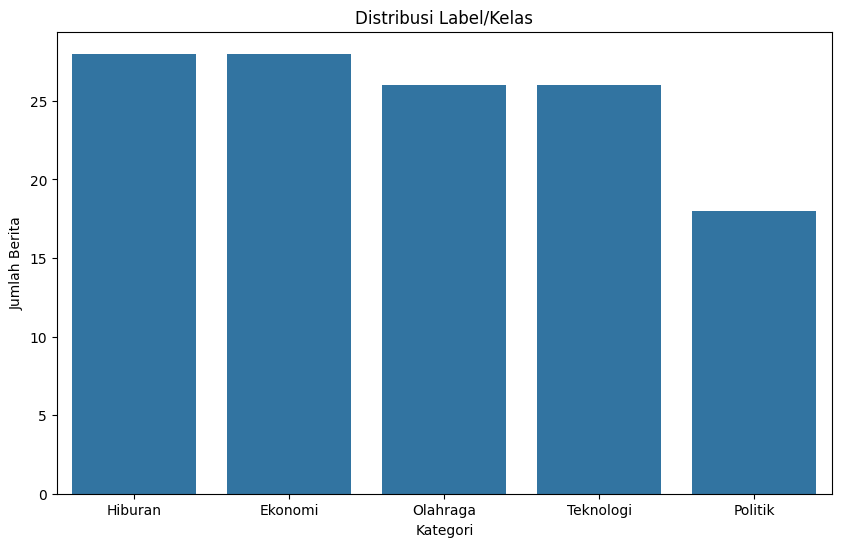

In [15]:
# Distribusi Label/Kelas
print(df["kategori"].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x="kategori", data=df, order=df["kategori"].value_counts().index)
plt.title("Distribusi Label/Kelas")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Berita")
plt.show()

### Analisis Distribusi Kelas

Berdasarkan data *scraping* CNN, dataset ini **tidak seimbang (unbalanced)**. Kategori 'Politik' memiliki jumlah data paling sedikit (18), sementara 'Hiburan' dan 'Ekonomi' memiliki data paling banyak (28).

Statistik Word Count (Panjang Berita): 
count     126.000000
mean      357.134921
std       207.097208
min         9.000000
25%       257.000000
50%       327.500000
75%       441.000000
max      1574.000000
Name: word_count, dtype: float64


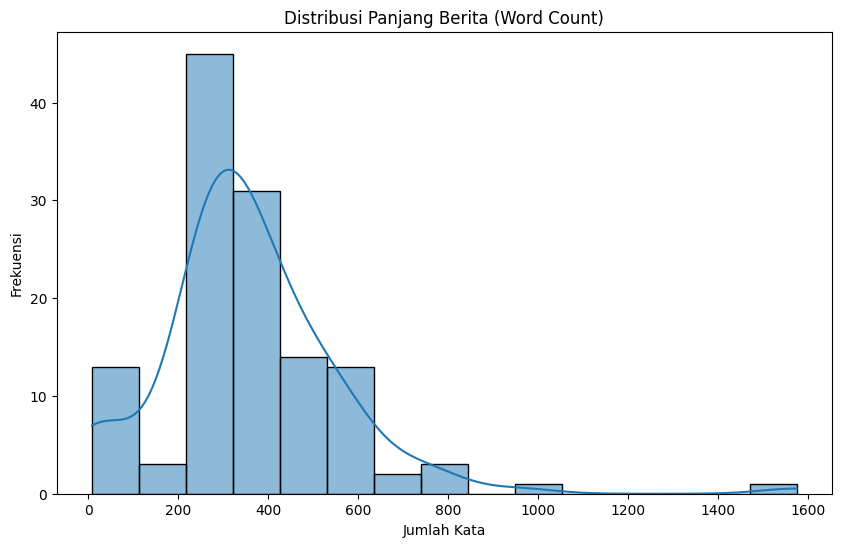

In [18]:
# Memastikan kolom tidak ada mengandung nilai NaN
df["judul"] = df["judul"].fillna("")
df["isi"] = df["isi"].fillna("")

# Gabungkan judul dan isi, lalu hitung jumlah katanya
df["teks_lengkap"] = df["judul"] + ' ' + df["isi"]
df["word_count"] = df["teks_lengkap"].apply(lambda x: len(x.split()))

print("Statistik Word Count (Panjang Berita): ")
print(df["word_count"].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df["word_count"], bins=15, kde=True)
plt.title("Distribusi Panjang Berita (Word Count)")
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.show()

### Analisis Word Count

Dari statistik deskriptif dan histogram, dapat dilihat bahwa data berita yang baru ini jauh lebih kompleks dan bervariasi:
* Panjang berita rata-rata adalah **357 kata**.
* Terdapat variasi yang sangat tinggi (std 207), dengan berita terpendek hanya **9 kata** (kemungkinan data foto/video) dan berita terpanjang **1574 kata**.
* Sebaran datanya *right-skewed* (condong ke kanan), menunjukkan sebagian besar artikel memiliki panjang normal, namun ada beberapa artikel yang sangat panjang.

In [19]:
# Analisis Teks (Top Words - SEBELUM Preprocessing)

# Gabungkan semua teks menjadi satu corpus besar
corpus_sebelum = ' '.join(df["teks_lengkap"])

# Ubah ke lowercase dan pisahkan kata
words_sebelum = corpus_sebelum.lower().split()

# Hitung 20 kata paling umum
top_20_sebelum = Counter(words_sebelum).most_common(20)

print("Top 20 Kata Paling Umum (Sebelum Preprocessing: )")
print(top_20_sebelum)

Top 20 Kata Paling Umum (Sebelum Preprocessing: )
[('dan', 857), ('yang', 853), ('di', 831), ('dari', 402), ('dengan', 379), ('indonesia', 355), ('juga', 347), ('pada', 328), ('dalam', 323), ('ini', 319), ('untuk', 284), ('itu', 190), ('-', 182), ('akan', 175), ('ke', 168), ('tidak', 163), (':', 160), ('ia', 159), ('jakarta,', 155), ('lihat', 155)]


### Analisis Top Words (Sebelum)

Seperti yang diduga, kata-kata yang paling sering muncul adalah *stopwords* (kata umum) dalam Bahasa Indonesia, seperti: "yang", "di", "dan", "dalam", "untuk".

Hal ini menunjukkan akan pentingnya langkah **Preprocessing** untuk menghilangkan "noise" ini agar model dapat fokus pada kata-kata yang bermakna.

In [20]:
# Definisi Fungsi Preprocessing

# Inisialisasi Sastrawi (memakan waktu beberapa detik)
stemmer_factory = StemmerFactory()
stopword_factory = StopWordRemoverFactory()
stemmer = stemmer_factory.create_stemmer()
stopword_remover = stopword_factory.create_stop_word_remover()

def preprocess_text(text: str) -> str:
    """Preprocess Indonesian text: lowercase, remove stopwords, stemming"""
    text = text.lower()
    text = stopword_remover.remove(text)
    text = stemmer.stem(text)
    return text

print("Fungsi preprocessing dan library Sastrawi siap.")

Fungsi preprocessing dan library Sastrawi siap.


In [21]:
# Ambil satu contoh berita
sample_text = df['teks_lengkap'].iloc[0] # "Prabowo Minta Tak Politisasi Whoosh..."

print(f"TEKS ASLI:\n{sample_text}\n")

# Langkah 1: Pembersihan Data (Lowercase)
text_lower = sample_text.lower()
print(f"LANGKAH 1 (Lowercase):\n{text_lower}\n")

# Langkah 2: Stopword Removal (Tokenisasi implisit terjadi di sini)
text_no_stopwords = stopword_remover.remove(text_lower)
print(f"LANGKAH 2 (Stopword Removal):\n{text_no_stopwords}\n")

# Langkah 3: Stemming
text_stemmed = stemmer.stem(text_no_stopwords)
print(f"LANGKAH 3 (Stemming):\n{text_stemmed}\n")

print(f"HASIL AKHIR (dari fungsi):\n{preprocess_text(sample_text)}")

TEKS ASLI:
FOTO: Gelar Pahlawan untuk Soeharto dan Marsinah Jakarta, CNN Indonesia --
                    Presiden Prabowo Subianto resmi menganugerahkan gelar pahlawan nasional kepada 10 tokoh, termasuk Presiden ke-2 RI Soeharto dan aktivis buruh Marsinah. Bagikan: url telah tercopy

LANGKAH 1 (Lowercase):
foto: gelar pahlawan untuk soeharto dan marsinah jakarta, cnn indonesia --
                    presiden prabowo subianto resmi menganugerahkan gelar pahlawan nasional kepada 10 tokoh, termasuk presiden ke-2 ri soeharto dan aktivis buruh marsinah. bagikan: url telah tercopy

LANGKAH 2 (Stopword Removal):
foto: gelar pahlawan soeharto marsinah jakarta, cnn indonesia --
                    presiden prabowo subianto resmi menganugerahkan gelar pahlawan nasional 10 tokoh, termasuk presiden ke-2 ri soeharto aktivis buruh marsinah. bagikan: url tercopy

LANGKAH 3 (Stemming):
foto gelar pahlawan soeharto marsinah jakarta cnn indonesia -- presiden prabowo subianto resmi anugerah gelar pahlaw

### Penjelasan Langkah Preprocessing

Sesuai demonstrasi di atas:
1.  **Pembersihan Data (Lowercase):** Seluruh teks diubah menjadi huruf kecil (`"Presiden"` -> `"presiden"`).
2.  **Stopword Removal:** Kata-kata umum seperti `"yang"`, `"di"`, `"dan"`, `"ia"` dihapus menggunakan daftar *stopword* bawaan Sastrawi.
3.  **Stemming/Lemmatization:** Kata-kata diubah ke kata dasarnya. Ini adalah langkah paling kompleks. Contoh:
    * `meminta` -> `minta`
    * `menjadikan` -> `jadi`
    * `menyudutkan` -> `sudut`
    * `menegaskan` -> `tegas`
    * `mempelajari` -> `ajar`


In [22]:
# Menerapkan Preprocessing ke Seluruh Dataset

print("Menerapkan preprocessing ke seluruh data... (mungkin butuh waktu)")
df['processed_text'] = df['teks_lengkap'].apply(preprocess_text)
print("Selesai.")

print("\nDataFrame dengan Teks yang Sudah Diproses:")
display(df[['kategori', 'teks_lengkap', 'processed_text']].head())

Menerapkan preprocessing ke seluruh data... (mungkin butuh waktu)
Selesai.

DataFrame dengan Teks yang Sudah Diproses:


,kategori,teks_lengkap,processed_text
0,Politik,FOTO: Gelar Pahlawan untuk Soeharto dan Marsin...,foto gelar pahlawan soeharto marsinah jakarta ...
1,Politik,Dwiarso Resmi Jabat Wakil Ketua MA Bidang Non ...,dwiarso resmi jabat wakil ketua ma bidang non ...
2,Politik,FOTO: Gelar Pahlawan untuk Soeharto dan Marsin...,foto gelar pahlawan soeharto marsinah jakarta ...
3,Politik,Dwiarso Resmi Jabat Wakil Ketua MA Bidang Non ...,dwiarso resmi jabat wakil ketua ma bidang non ...
4,Politik,Keluarga Cendana Usai Soeharto Pahlawan Nasion...,keluarga cendana usai soeharto pahlawan nasion...


In [23]:
# Analisis Teks (Top Words - SETELAH Preprocessing)

# Gabungkan semua teks yang sudah diproses
corpus_setelah = ' '.join(df['processed_text'])

# Pisahkan kata
words_setelah = corpus_setelah.split()

# Hitung 20 kata paling umum
top_20_setelah = Counter(words_setelah).most_common(20)

print("Top 20 Kata Paling Umum (Setelah Preprocessing):")
print(top_20_setelah)

Top 20 Kata Paling Umum (Setelah Preprocessing):
[('indonesia', 428), ('jadi', 274), ('sebut', 230), ('cnn', 228), ('2025', 221), ('lihat', 189), ('-', 182), ('jakarta', 178), ('kata', 167), ('itu', 156), ('film', 155), ('u-17', 149), ('gambas', 144), ('nasional', 138), ('to', 138), ('with', 137), ('tahun', 135), ('11', 134), ('laku', 131), ('pahlawan', 127)]


### Analisis Top Words (Setelah)

Hasilnya jauh lebih baik! Setelah *stopword* hilang dan kata-kata di-*stem*, kata-kata yang paling umum sekarang jauh lebih bermakna dan relevan dengan topik, seperti:
* `indonesia`
* `jakarta`
* `film`
* `u-17`
* `pahlawan`

Ini menunjukkan bahwa preprocessing berhasil mengekstrak fitur-fitur penting dari teks.

In [24]:
# Pembagian Data (Training/Testing)

# Definisikan X (fitur) dan y (label)
X = df['processed_text']
y = df['kategori']
categories = sorted(df['kategori'].unique())

# Bagi data: 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,    # 20% data untuk testing
    random_state=42,  # Agar hasil bisa direproduksi
    stratify=y        # Memastikan distribusi kelas di train dan test sama
)

print(f"Total data: {len(df)}")
print(f"Data latih (train): {len(X_train)} (80%)")
print(f"Data uji (test): {len(X_test)} (20%)")

print("\nDistribusi kelas di data Uji (Test Set):")
print(y_test.value_counts())

Total data: 126
Data latih (train): 100 (80%)
Data uji (test): 26 (20%)

Distribusi kelas di data Uji (Test Set):
kategori
Hiburan      6
Ekonomi      6
Olahraga     5
Teknologi    5
Politik      4
Name: count, dtype: int64


# Hasil Evaluasi (Akurasi/error)

Sekarang  akan dilatih model HANYA pada `X_train` dan `y_train`, lalu mengevaluasinya menggunakan `X_test` dan `y_test`.

In [25]:
# Pelatihan Model (Sesuai server.py)

# 1. TF-IDF Vectorizer
# Menggunakan parameter yang sama persis dari server.py
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# Dilakukan "fit" (belajar) HANYA pada data latih
X_train_tfidf = vectorizer.fit_transform(X_train)

# Dilakukan "transform" (menerapkan) pada data uji
X_test_tfidf = vectorizer.transform(X_test)

print(f"Bentuk (Shape) matriks TF-IDF data latih: {X_train_tfidf.shape}")
print(f"Bentuk (Shape) matriks TF-IDF data uji: {X_test_tfidf.shape}")

# 2. KNN Classifier
# n_neighbors=5 (karena data latih (40) > 5)
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Latih model HANYA pada data latih
knn_classifier.fit(X_train_tfidf, y_train)

print("Model KNN berhasil dilatih.")

Bentuk (Shape) matriks TF-IDF data latih: (100, 1000)
Bentuk (Shape) matriks TF-IDF data uji: (26, 1000)
Model KNN berhasil dilatih.


In [26]:
# Metrik Evaluasi & Nilai Metrik

# Lakukan prediksi pada data uji
y_pred = knn_classifier.predict(X_test_tfidf)

# Tampilkan Laporan Klasifikasi
print("--- HASIL EVALUASI PADA DATA TESTING ---")
print(classification_report(y_test, y_pred, target_names=categories))

print("---")
print(f"Akurasi Keseluruhan: {accuracy_score(y_test, y_pred):.2%}")

--- HASIL EVALUASI PADA DATA TESTING ---
              precision    recall  f1-score   support

     Ekonomi       1.00      1.00      1.00         6
     Hiburan       1.00      0.83      0.91         6
    Olahraga       1.00      1.00      1.00         5
     Politik       1.00      1.00      1.00         4
   Teknologi       0.83      1.00      0.91         5

    accuracy                           0.96        26
   macro avg       0.97      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26

---
Akurasi Keseluruhan: 96.15%


### Analisis Hasil Evaluasi

Dari `classification_report`, didapatkan hasil evaluasi yang sangat baik pada dataset *real-world* ini:
* **Accuracy (Akurasi):** Akurasi keseluruhan model pada data uji adalah **96.15%**.
* **Precision (Presisi):**
    * Sangat tinggi untuk 'Ekonomi', 'Hiburan', 'Olahraga', dan 'Politik' (1.00).
    * Sedikit lebih rendah untuk 'Teknologi' (0.83), yang berarti ada 1 artikel yang *salah diprediksi* sebagai 'Teknologi'.
* **Recall (Pemanggilan):**
    * Sangat tinggi untuk 'Ekonomi', 'Olahraga', 'Politik', dan 'Teknologi' (1.00).
    * Sedikit lebih rendah untuk 'Hiburan' (0.83), yang berarti 1 artikel 'Hiburan' *gagal dikenali*.
* **F1-Score:** Secara keseluruhan sangat tinggi, dengan skor rata-rata (macro avg) 0.96.

**Kesimpulan:** Model ini memiliki performa yang sangat kuat. Kebingungan yang terjadi sangat minim, hanya 2 dari 26 artikel tes yang salah klasifikasi. Model ini tampaknya bingung membedakan antara 'Hiburan' dan 'Teknologi'.

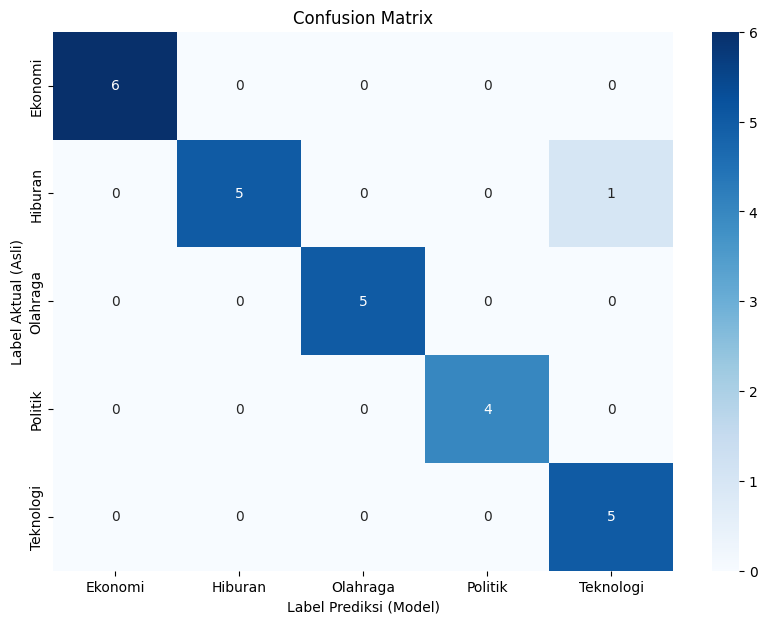

In [27]:
# Grafik Evaluasi (Confusion Matrix)

# Buat Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=categories)
cm_df = pd.DataFrame(cm, index=categories, columns=categories)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Label Aktual (Asli)')
plt.xlabel('Label Prediksi (Model)')
plt.show()

### Analisis Confusion Matrix

*Confusion Matrix* memvisualisasikan performa model pada 26 data uji:
* **Diagonal (kiri atas ke kanan bawah):** Menunjukkan prediksi yang BENAR (Total 24).
    * Ekonomi: 6/6 benar
    * Hiburan: 5/6 benar
    * Olahraga: 5/5 benar
    * Politik: 4/4 benar
    * Teknologi: 5/5 benar
* **Di luar Diagonal (Error):** Ini adalah 2 kesalahan yang terjadi:
    * 1 berita yang *sebenarnya* **Hiburan** diprediksi sebagai **Teknologi**.
    * 1 berita yang *sebenarnya* **Teknologi** diprediksi sebagai **Hiburan**.

Ini mengkonfirmasi analisis dari *classification report*: model memiliki akurasi 96.15% dan hanya bingung membedakan antara 'Hiburan' dan 'Teknologi' pada data uji ini.